In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Nellore']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
2122,2359,14.53,80.16,Nellore,Indukurpeta,Gangapatnam,Black,7.75,0.65,1.04,...,126.0,1212.0,389.0,45.75,5.02,1.92,24.80,1.64,1.60,Paddy
2123,2360,14.53,80.15,Nellore,Indukurpeta,Gangapatnam,Black,7.02,0.56,0.81,...,116.0,796.0,313.0,32.27,0.96,1.54,21.10,0.98,0.24,Paddy
2124,2361,14.53,80.16,Nellore,Indukurpeta,Gangapatnam,Black,7.50,0.31,0.46,...,74.0,662.0,247.0,20.89,1.94,1.84,17.96,0.70,0.38,Paddy
2125,2362,14.54,80.16,Nellore,Indukurpeta,Gangapatnam,Black,8.28,0.90,0.65,...,106.0,2425.0,422.0,13.88,3.92,1.08,70.68,2.26,5.60,Paddy
2126,2363,14.54,80.16,Nellore,Indukurpeta,Gangapatnam,Black,8.11,0.96,0.50,...,92.0,2264.0,295.0,106.90,5.66,1.25,31.18,1.46,2.78,Paddy


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,7.937333,0.617448,0.598897,12.970276,189.786207,3501.717241,770.052874,93.140805,1.936368,1.536966,39.908828,3.049977,11.783747
std,0.680049,0.648608,0.242528,15.480318,139.508957,1677.652106,413.569089,151.978416,2.283530,0.831028,39.992340,2.119376,9.013484
min,5.250000,0.060000,0.120000,0.660000,33.000000,237.000000,48.000000,1.880000,0.100000,0.160000,1.040000,0.180000,0.090000
25%,7.780000,0.180000,0.400000,4.845000,112.500000,2339.000000,454.500000,7.520000,0.550000,0.900000,4.485000,1.175000,6.265000
50%,8.120000,0.490000,0.570000,8.380000,164.000000,3205.000000,686.000000,55.550000,1.200000,1.390000,29.700000,2.360000,9.130000
75%,8.340000,0.815000,0.790000,14.490000,232.500000,4595.000000,1014.000000,121.180000,2.325000,2.035000,65.100000,4.605000,14.690000
max,9.330000,7.850000,1.330000,144.750000,2069.000000,9763.000000,1989.000000,2210.320000,23.920000,8.270000,210.830000,9.730000,60.260000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Redsoil', ' Black'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace([' Black', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Redsoil', 'Red Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 326, 'Red Soil': 109}

<BarContainer object of 2 artists>

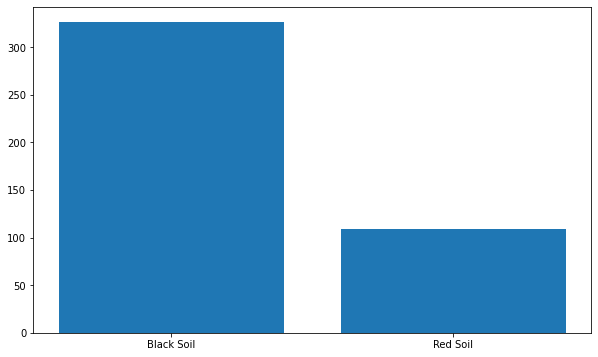

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy', 'Citrus', 'Black gram', 'Green Gram', 'Banana'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy         267
Citrus        105
Black gram     58
Green Gram      3
Banana          2
Name: Crop, dtype: int64

Paddy         267
Citrus        105
Black gram     58
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

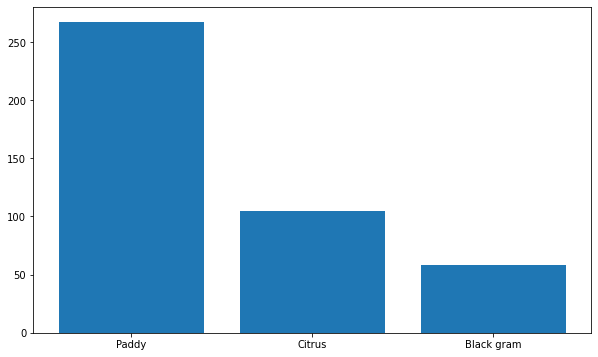

In [15]:
df = df[(df['Crop'] != 'Green Gram') & (df['Crop'] != 'Banana')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,-0.108915,-0.399399,-0.099154,0.097205,0.450152,0.122614,-0.138248,-0.318327,-0.213884,-0.667716,-0.310622,-0.358780
EC,-0.108915,1.000000,0.331162,0.141713,0.093619,-0.101416,0.231990,0.902309,0.222913,0.649595,0.351346,0.388928,0.225186
OC,-0.399399,0.331162,1.000000,0.290462,0.234016,-0.167425,0.375132,0.275485,0.404378,0.591678,0.577696,0.632627,0.446818
P,-0.099154,0.141713,0.290462,1.000000,0.356177,-0.141434,0.090374,0.056146,0.317506,0.232979,0.111724,0.052044,0.028789
K,0.097205,0.093619,0.234016,0.356177,1.000000,0.140109,0.414285,0.028019,0.053325,0.269589,-0.001686,0.251244,0.210238
Ca,0.450152,-0.101416,-0.167425,-0.141434,0.140109,1.000000,0.451852,-0.034903,-0.279925,-0.038406,-0.395262,-0.094940,-0.029566
Mg,0.122614,0.231990,0.375132,0.090374,0.414285,0.451852,1.000000,0.172174,0.005222,0.524759,0.173382,0.595319,0.453250
S,-0.138248,0.902309,0.275485,0.056146,0.028019,-0.034903,0.172174,1.000000,0.179381,0.615608,0.297580,0.320158,0.182469
Zn,-0.318327,0.222913,0.404378,0.317506,0.053325,-0.279925,0.005222,0.179381,1.000000,0.252096,0.355795,0.277374,0.092095
B,-0.213884,0.649595,0.591678,0.232979,0.269589,-0.038406,0.524759,0.615608,0.252096,1.000000,0.530394,0.633859,0.507055


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['S', 'B', 'Fe', 'Cu', 'Mn']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'K', 'Ca', 'Mg', 'Zn', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P      K      Ca     Mg    Zn  Black Soil  Red Soil
2122  7.75  0.65  1.04  3.18  126.0  1212.0  389.0  5.02           1         0
2122    Paddy
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:8] = sc1.fit_transform(X[:, 0:8])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [23]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [24]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [25]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8703703703703703


In [26]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.80 %
Standard Deviation: 5.59 %


# Decision Tree Classifier

In [27]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8055555555555556


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.50 %
Standard Deviation: 5.63 %


# Random Forest Classifier

In [31]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8796296296296297


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.65 %
Standard Deviation: 6.23 %


In [35]:
pickle.dump(clf3, open('Nellore_model.pkl', 'wb'))
pickle.dump(sc1, open('Nellore_scaler.pkl', 'wb'))

# XGBoost

In [36]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [37]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [38]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8611111111111112


In [39]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [40]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.78 %
Standard Deviation: 6.87 %


# Multi-layer Perceptron Classifier

In [41]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [42]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [43]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.9161490683229814
Testing Accuracy:  0.8703703703703703


In [44]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.35 %
Standard Deviation: 5.74 %


# Catboost

In [45]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.5476197	total: 144ms	remaining: 14.3s
1:	learn: 0.3850908	total: 144ms	remaining: 7.08s
2:	learn: 0.3673952	total: 145ms	remaining: 4.69s
3:	learn: 0.3511176	total: 145ms	remaining: 3.49s
4:	learn: 0.3442822	total: 146ms	remaining: 2.77s
5:	learn: 0.3330730	total: 146ms	remaining: 2.29s
6:	learn: 0.3012819	total: 147ms	remaining: 1.95s
7:	learn: 0.2933885	total: 147ms	remaining: 1.69s
8:	learn: 0.2881855	total: 148ms	remaining: 1.49s
9:	learn: 0.2787453	total: 148ms	remaining: 1.33s
10:	learn: 0.2771718	total: 148ms	remaining: 1.2s
11:	learn: 0.2669539	total: 149ms	remaining: 1.09s
12:	learn: 0.2646071	total: 149ms	remaining: 999ms
13:	learn: 0.2606564	total: 150ms	remaining: 920ms
14:	learn: 0.2591138	total: 150ms	remaining: 851ms
15:	learn: 0.2580111	total: 151ms	remaining: 793ms
16:	learn: 0.2543130	total: 152ms	remaining: 742ms
17:	learn: 0.2458489	total: 152ms	remaining: 694ms
18:	learn: 0.2314664	total: 153ms	remaining: 652ms
19:	learn: 0.2256550	total: 153ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3969597359
bestIteration = 98

Training on fold [1/5]

bestTest = 0.5096539995
bestIteration = 96

Training on fold [2/5]

bestTest = 0.3988650059
bestIteration = 99

Training on fold [3/5]

bestTest = 0.424183267
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3653504294
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0705774	test: 1.0701223	best: 1.0701223 (0)	total: 1.4ms	remaining: 1.4s
1:	learn: 1.0384313	test: 1.0391153	best: 1.0391153 (1)	total: 2.69ms	remaining: 1.34s
2:	learn: 1.0123691	test: 1.0131381	best: 1.0131381 (2)	total: 3.8ms	remaining: 1.26s
3:	learn: 0.9847966	test: 0.9863748	best: 0.9863748 (3)	total: 4.93ms	remaining: 1.23s
4:	learn: 0.9650532	test: 0.9655340	best: 0.9655340 (4)	total: 6ms	remaining: 1.19s
5:	learn: 0.9409374	test: 0.9402549	best: 0.9402549 (5)	total: 6.82ms	remaining: 1.13s
6:	learn: 0.9156442	test: 0.9148722	best: 0.9148722 (6)	total: 7.96ms	remaining: 1.13s
7:	learn: 0.8981846	test: 0.8993337	best: 0.8993337 (7)	total: 9.16ms	remaining: 1.14s
8:	learn: 0.8806673	test: 0.8796328	best: 0.8796328 (8)	total: 10.3ms	remaining: 1.13s
9:	learn: 0.8593396	test: 0.8589574	best: 0.8589574 (9)	total: 11.4ms	remaining: 1.13s
10:	learn: 0.8391640	test: 0.8378522	best: 0.8378522 (10)	total: 12.6ms	remaining: 1.13s
11:	learn: 0.8226180	test: 0.8217096	best: 0.82

144:	learn: 0.2914333	test: 0.2980928	best: 0.2980928 (144)	total: 170ms	remaining: 1s
145:	learn: 0.2907050	test: 0.2970635	best: 0.2970635 (145)	total: 171ms	remaining: 1s
146:	learn: 0.2890729	test: 0.2962026	best: 0.2962026 (146)	total: 173ms	remaining: 1s
147:	learn: 0.2885319	test: 0.2959534	best: 0.2959534 (147)	total: 174ms	remaining: 1s
148:	learn: 0.2877344	test: 0.2955566	best: 0.2955566 (148)	total: 175ms	remaining: 999ms
149:	learn: 0.2866881	test: 0.2947794	best: 0.2947794 (149)	total: 176ms	remaining: 998ms
150:	learn: 0.2862167	test: 0.2942929	best: 0.2942929 (150)	total: 177ms	remaining: 996ms
151:	learn: 0.2855379	test: 0.2941030	best: 0.2941030 (151)	total: 178ms	remaining: 994ms
152:	learn: 0.2848364	test: 0.2935902	best: 0.2935902 (152)	total: 179ms	remaining: 993ms
153:	learn: 0.2838722	test: 0.2938386	best: 0.2935902 (152)	total: 181ms	remaining: 992ms
154:	learn: 0.2830703	test: 0.2935323	best: 0.2935323 (154)	total: 182ms	remaining: 990ms
155:	learn: 0.2820707	

283:	learn: 0.2158766	test: 0.2562516	best: 0.2560064 (280)	total: 343ms	remaining: 864ms
284:	learn: 0.2151619	test: 0.2560388	best: 0.2560064 (280)	total: 344ms	remaining: 863ms
285:	learn: 0.2147150	test: 0.2558403	best: 0.2558403 (285)	total: 346ms	remaining: 863ms
286:	learn: 0.2143844	test: 0.2556986	best: 0.2556986 (286)	total: 347ms	remaining: 861ms
287:	learn: 0.2139142	test: 0.2555760	best: 0.2555760 (287)	total: 348ms	remaining: 860ms
288:	learn: 0.2134684	test: 0.2555503	best: 0.2555503 (288)	total: 349ms	remaining: 859ms
289:	learn: 0.2132943	test: 0.2556851	best: 0.2555503 (288)	total: 350ms	remaining: 858ms
290:	learn: 0.2129415	test: 0.2553623	best: 0.2553623 (290)	total: 352ms	remaining: 857ms
291:	learn: 0.2127786	test: 0.2551560	best: 0.2551560 (291)	total: 353ms	remaining: 856ms
292:	learn: 0.2121205	test: 0.2547416	best: 0.2547416 (292)	total: 355ms	remaining: 856ms
293:	learn: 0.2119558	test: 0.2548200	best: 0.2547416 (292)	total: 356ms	remaining: 855ms
294:	learn

421:	learn: 0.1718471	test: 0.2438322	best: 0.2432665 (408)	total: 516ms	remaining: 707ms
422:	learn: 0.1715254	test: 0.2435651	best: 0.2432665 (408)	total: 518ms	remaining: 706ms
423:	learn: 0.1712673	test: 0.2434015	best: 0.2432665 (408)	total: 519ms	remaining: 705ms
424:	learn: 0.1710033	test: 0.2434142	best: 0.2432665 (408)	total: 521ms	remaining: 704ms
425:	learn: 0.1706617	test: 0.2434436	best: 0.2432665 (408)	total: 522ms	remaining: 703ms
426:	learn: 0.1704926	test: 0.2433495	best: 0.2432665 (408)	total: 523ms	remaining: 702ms
427:	learn: 0.1701737	test: 0.2436324	best: 0.2432665 (408)	total: 524ms	remaining: 701ms
428:	learn: 0.1700368	test: 0.2434773	best: 0.2432665 (408)	total: 525ms	remaining: 699ms
429:	learn: 0.1699472	test: 0.2435750	best: 0.2432665 (408)	total: 526ms	remaining: 698ms
430:	learn: 0.1697542	test: 0.2434317	best: 0.2432665 (408)	total: 528ms	remaining: 697ms
431:	learn: 0.1696520	test: 0.2435279	best: 0.2432665 (408)	total: 529ms	remaining: 695ms
432:	learn

565:	learn: 0.1378258	test: 0.2371019	best: 0.2366597 (526)	total: 689ms	remaining: 528ms
566:	learn: 0.1375117	test: 0.2367719	best: 0.2366597 (526)	total: 690ms	remaining: 527ms
567:	learn: 0.1373957	test: 0.2369759	best: 0.2366597 (526)	total: 691ms	remaining: 526ms
568:	learn: 0.1370798	test: 0.2371255	best: 0.2366597 (526)	total: 693ms	remaining: 525ms
569:	learn: 0.1370006	test: 0.2371715	best: 0.2366597 (526)	total: 694ms	remaining: 523ms
570:	learn: 0.1368737	test: 0.2371353	best: 0.2366597 (526)	total: 695ms	remaining: 522ms
571:	learn: 0.1366884	test: 0.2370717	best: 0.2366597 (526)	total: 696ms	remaining: 521ms
572:	learn: 0.1364742	test: 0.2372416	best: 0.2366597 (526)	total: 697ms	remaining: 519ms
573:	learn: 0.1363326	test: 0.2370283	best: 0.2366597 (526)	total: 698ms	remaining: 518ms
574:	learn: 0.1361389	test: 0.2369671	best: 0.2366597 (526)	total: 699ms	remaining: 517ms
575:	learn: 0.1360755	test: 0.2370272	best: 0.2366597 (526)	total: 700ms	remaining: 515ms
576:	learn

720:	learn: 0.1111114	test: 0.2309879	best: 0.2298903 (699)	total: 862ms	remaining: 333ms
721:	learn: 0.1110508	test: 0.2308744	best: 0.2298903 (699)	total: 863ms	remaining: 332ms
722:	learn: 0.1107750	test: 0.2309858	best: 0.2298903 (699)	total: 864ms	remaining: 331ms
723:	learn: 0.1106877	test: 0.2309809	best: 0.2298903 (699)	total: 865ms	remaining: 330ms
724:	learn: 0.1105148	test: 0.2309124	best: 0.2298903 (699)	total: 866ms	remaining: 329ms
725:	learn: 0.1102476	test: 0.2310140	best: 0.2298903 (699)	total: 867ms	remaining: 327ms
726:	learn: 0.1098814	test: 0.2308810	best: 0.2298903 (699)	total: 869ms	remaining: 326ms
727:	learn: 0.1097969	test: 0.2307015	best: 0.2298903 (699)	total: 870ms	remaining: 325ms
728:	learn: 0.1097153	test: 0.2308460	best: 0.2298903 (699)	total: 871ms	remaining: 324ms
729:	learn: 0.1095752	test: 0.2308506	best: 0.2298903 (699)	total: 872ms	remaining: 322ms
730:	learn: 0.1094852	test: 0.2309923	best: 0.2298903 (699)	total: 873ms	remaining: 321ms
731:	learn

869:	learn: 0.0918904	test: 0.2299609	best: 0.2295347 (819)	total: 1.03s	remaining: 155ms
870:	learn: 0.0917594	test: 0.2301245	best: 0.2295347 (819)	total: 1.04s	remaining: 154ms
871:	learn: 0.0916473	test: 0.2300289	best: 0.2295347 (819)	total: 1.04s	remaining: 152ms
872:	learn: 0.0915035	test: 0.2299649	best: 0.2295347 (819)	total: 1.04s	remaining: 151ms
873:	learn: 0.0914409	test: 0.2299219	best: 0.2295347 (819)	total: 1.04s	remaining: 150ms
874:	learn: 0.0913030	test: 0.2299735	best: 0.2295347 (819)	total: 1.04s	remaining: 149ms
875:	learn: 0.0911328	test: 0.2299759	best: 0.2295347 (819)	total: 1.04s	remaining: 148ms
876:	learn: 0.0910211	test: 0.2299574	best: 0.2295347 (819)	total: 1.04s	remaining: 146ms
877:	learn: 0.0907907	test: 0.2304965	best: 0.2295347 (819)	total: 1.04s	remaining: 145ms
878:	learn: 0.0907077	test: 0.2306607	best: 0.2295347 (819)	total: 1.04s	remaining: 144ms
879:	learn: 0.0906089	test: 0.2306508	best: 0.2295347 (819)	total: 1.05s	remaining: 143ms
880:	learn

2:	learn: 0.8642710	test: 0.8691825	best: 0.8691825 (2)	total: 7.07ms	remaining: 2.35s
3:	learn: 0.8019992	test: 0.8082936	best: 0.8082936 (3)	total: 8.51ms	remaining: 2.12s
4:	learn: 0.7628919	test: 0.7667058	best: 0.7667058 (4)	total: 9.81ms	remaining: 1.95s
5:	learn: 0.7198341	test: 0.7154903	best: 0.7154903 (5)	total: 11ms	remaining: 1.82s
6:	learn: 0.6784962	test: 0.6739002	best: 0.6739002 (6)	total: 12.2ms	remaining: 1.73s
7:	learn: 0.6393221	test: 0.6329863	best: 0.6329863 (7)	total: 13.4ms	remaining: 1.66s
8:	learn: 0.6072697	test: 0.5949383	best: 0.5949383 (8)	total: 14.5ms	remaining: 1.59s
9:	learn: 0.5754805	test: 0.5595798	best: 0.5595798 (9)	total: 15.7ms	remaining: 1.55s
10:	learn: 0.5526684	test: 0.5346233	best: 0.5346233 (10)	total: 16.8ms	remaining: 1.51s
11:	learn: 0.5312624	test: 0.5123582	best: 0.5123582 (11)	total: 18.5ms	remaining: 1.52s
12:	learn: 0.5088802	test: 0.4914070	best: 0.4914070 (12)	total: 20.2ms	remaining: 1.53s
13:	learn: 0.4900910	test: 0.4715579	be

148:	learn: 0.1574676	test: 0.2431552	best: 0.2404503 (144)	total: 180ms	remaining: 1.03s
149:	learn: 0.1558275	test: 0.2439192	best: 0.2404503 (144)	total: 181ms	remaining: 1.03s
150:	learn: 0.1539941	test: 0.2451486	best: 0.2404503 (144)	total: 183ms	remaining: 1.03s
151:	learn: 0.1536450	test: 0.2450902	best: 0.2404503 (144)	total: 184ms	remaining: 1.03s
152:	learn: 0.1531758	test: 0.2452254	best: 0.2404503 (144)	total: 185ms	remaining: 1.02s
153:	learn: 0.1528219	test: 0.2453116	best: 0.2404503 (144)	total: 186ms	remaining: 1.02s
154:	learn: 0.1518212	test: 0.2452722	best: 0.2404503 (144)	total: 188ms	remaining: 1.02s
155:	learn: 0.1506035	test: 0.2439296	best: 0.2404503 (144)	total: 189ms	remaining: 1.02s
156:	learn: 0.1497799	test: 0.2438017	best: 0.2404503 (144)	total: 190ms	remaining: 1.02s
157:	learn: 0.1491862	test: 0.2448500	best: 0.2404503 (144)	total: 191ms	remaining: 1.02s
158:	learn: 0.1484309	test: 0.2446954	best: 0.2404503 (144)	total: 192ms	remaining: 1.02s
159:	learn

309:	learn: 0.0770922	test: 0.2404688	best: 0.2372810 (290)	total: 367ms	remaining: 816ms
310:	learn: 0.0767874	test: 0.2398561	best: 0.2372810 (290)	total: 368ms	remaining: 816ms
311:	learn: 0.0765705	test: 0.2398473	best: 0.2372810 (290)	total: 369ms	remaining: 815ms
312:	learn: 0.0762891	test: 0.2395150	best: 0.2372810 (290)	total: 371ms	remaining: 814ms
313:	learn: 0.0760728	test: 0.2394931	best: 0.2372810 (290)	total: 372ms	remaining: 812ms
314:	learn: 0.0758658	test: 0.2399528	best: 0.2372810 (290)	total: 373ms	remaining: 811ms
315:	learn: 0.0756600	test: 0.2404054	best: 0.2372810 (290)	total: 374ms	remaining: 810ms
316:	learn: 0.0752938	test: 0.2406645	best: 0.2372810 (290)	total: 375ms	remaining: 808ms
317:	learn: 0.0750830	test: 0.2402381	best: 0.2372810 (290)	total: 376ms	remaining: 807ms
318:	learn: 0.0745508	test: 0.2411321	best: 0.2372810 (290)	total: 377ms	remaining: 806ms
319:	learn: 0.0743802	test: 0.2411618	best: 0.2372810 (290)	total: 379ms	remaining: 805ms
320:	learn

446:	learn: 0.0487908	test: 0.2403938	best: 0.2372810 (290)	total: 526ms	remaining: 651ms
447:	learn: 0.0486432	test: 0.2408788	best: 0.2372810 (290)	total: 528ms	remaining: 650ms
448:	learn: 0.0484770	test: 0.2408969	best: 0.2372810 (290)	total: 529ms	remaining: 650ms
449:	learn: 0.0483109	test: 0.2403841	best: 0.2372810 (290)	total: 531ms	remaining: 648ms
450:	learn: 0.0481447	test: 0.2406751	best: 0.2372810 (290)	total: 532ms	remaining: 647ms
451:	learn: 0.0480646	test: 0.2404192	best: 0.2372810 (290)	total: 533ms	remaining: 646ms
452:	learn: 0.0480026	test: 0.2400971	best: 0.2372810 (290)	total: 534ms	remaining: 644ms
453:	learn: 0.0479437	test: 0.2399405	best: 0.2372810 (290)	total: 535ms	remaining: 643ms
454:	learn: 0.0477807	test: 0.2396620	best: 0.2372810 (290)	total: 536ms	remaining: 642ms
455:	learn: 0.0476869	test: 0.2400938	best: 0.2372810 (290)	total: 537ms	remaining: 640ms
456:	learn: 0.0475502	test: 0.2396782	best: 0.2372810 (290)	total: 538ms	remaining: 639ms
457:	learn

598:	learn: 0.0335901	test: 0.2475482	best: 0.2372810 (290)	total: 700ms	remaining: 469ms
599:	learn: 0.0335634	test: 0.2476654	best: 0.2372810 (290)	total: 702ms	remaining: 468ms
600:	learn: 0.0334683	test: 0.2480444	best: 0.2372810 (290)	total: 703ms	remaining: 467ms
601:	learn: 0.0333503	test: 0.2481930	best: 0.2372810 (290)	total: 704ms	remaining: 466ms
602:	learn: 0.0333154	test: 0.2481562	best: 0.2372810 (290)	total: 706ms	remaining: 464ms
603:	learn: 0.0332392	test: 0.2479899	best: 0.2372810 (290)	total: 707ms	remaining: 463ms
604:	learn: 0.0332150	test: 0.2477814	best: 0.2372810 (290)	total: 708ms	remaining: 462ms
605:	learn: 0.0331360	test: 0.2479982	best: 0.2372810 (290)	total: 709ms	remaining: 461ms
606:	learn: 0.0330920	test: 0.2479907	best: 0.2372810 (290)	total: 710ms	remaining: 460ms
607:	learn: 0.0330393	test: 0.2482658	best: 0.2372810 (290)	total: 711ms	remaining: 458ms
608:	learn: 0.0330200	test: 0.2481413	best: 0.2372810 (290)	total: 712ms	remaining: 457ms
609:	learn

757:	learn: 0.0247712	test: 0.2489311	best: 0.2372810 (290)	total: 874ms	remaining: 279ms
758:	learn: 0.0247161	test: 0.2494571	best: 0.2372810 (290)	total: 876ms	remaining: 278ms
759:	learn: 0.0246637	test: 0.2499948	best: 0.2372810 (290)	total: 877ms	remaining: 277ms
760:	learn: 0.0246252	test: 0.2501485	best: 0.2372810 (290)	total: 878ms	remaining: 276ms
761:	learn: 0.0246163	test: 0.2501544	best: 0.2372810 (290)	total: 880ms	remaining: 275ms
762:	learn: 0.0245832	test: 0.2504106	best: 0.2372810 (290)	total: 881ms	remaining: 274ms
763:	learn: 0.0245150	test: 0.2503244	best: 0.2372810 (290)	total: 882ms	remaining: 272ms
764:	learn: 0.0244824	test: 0.2501557	best: 0.2372810 (290)	total: 883ms	remaining: 271ms
765:	learn: 0.0244235	test: 0.2503766	best: 0.2372810 (290)	total: 885ms	remaining: 270ms
766:	learn: 0.0244014	test: 0.2503384	best: 0.2372810 (290)	total: 886ms	remaining: 269ms
767:	learn: 0.0243533	test: 0.2505367	best: 0.2372810 (290)	total: 887ms	remaining: 268ms
768:	learn

927:	learn: 0.0189253	test: 0.2554589	best: 0.2372810 (290)	total: 1.06s	remaining: 82.1ms
928:	learn: 0.0188861	test: 0.2549544	best: 0.2372810 (290)	total: 1.06s	remaining: 81ms
929:	learn: 0.0188542	test: 0.2553712	best: 0.2372810 (290)	total: 1.06s	remaining: 79.9ms
930:	learn: 0.0188329	test: 0.2556737	best: 0.2372810 (290)	total: 1.06s	remaining: 78.8ms
931:	learn: 0.0188181	test: 0.2555410	best: 0.2372810 (290)	total: 1.06s	remaining: 77.6ms
932:	learn: 0.0187992	test: 0.2553207	best: 0.2372810 (290)	total: 1.06s	remaining: 76.5ms
933:	learn: 0.0187666	test: 0.2553583	best: 0.2372810 (290)	total: 1.07s	remaining: 75.3ms
934:	learn: 0.0187537	test: 0.2552781	best: 0.2372810 (290)	total: 1.07s	remaining: 74.2ms
935:	learn: 0.0187344	test: 0.2551050	best: 0.2372810 (290)	total: 1.07s	remaining: 73ms
936:	learn: 0.0187200	test: 0.2549165	best: 0.2372810 (290)	total: 1.07s	remaining: 71.9ms
937:	learn: 0.0186990	test: 0.2550521	best: 0.2372810 (290)	total: 1.07s	remaining: 70.8ms
938

30:	learn: 0.6138548	test: 0.6273095	best: 0.6273095 (30)	total: 83.5ms	remaining: 2.61s
31:	learn: 0.6041250	test: 0.6184929	best: 0.6184929 (31)	total: 87.1ms	remaining: 2.63s
32:	learn: 0.5967374	test: 0.6123494	best: 0.6123494 (32)	total: 90.2ms	remaining: 2.64s
33:	learn: 0.5871297	test: 0.6031423	best: 0.6031423 (33)	total: 93.5ms	remaining: 2.66s
34:	learn: 0.5795848	test: 0.5962840	best: 0.5962840 (34)	total: 96.9ms	remaining: 2.67s
35:	learn: 0.5704863	test: 0.5868044	best: 0.5868044 (35)	total: 98.9ms	remaining: 2.65s
36:	learn: 0.5622787	test: 0.5790706	best: 0.5790706 (36)	total: 103ms	remaining: 2.68s
37:	learn: 0.5541879	test: 0.5705102	best: 0.5705102 (37)	total: 106ms	remaining: 2.68s
38:	learn: 0.5470831	test: 0.5629693	best: 0.5629693 (38)	total: 108ms	remaining: 2.67s
39:	learn: 0.5414184	test: 0.5575285	best: 0.5575285 (39)	total: 111ms	remaining: 2.67s
40:	learn: 0.5345038	test: 0.5503987	best: 0.5503987 (40)	total: 114ms	remaining: 2.66s
41:	learn: 0.5268169	test:

160:	learn: 0.2392530	test: 0.2878715	best: 0.2878715 (160)	total: 447ms	remaining: 2.33s
161:	learn: 0.2386501	test: 0.2870193	best: 0.2870193 (161)	total: 450ms	remaining: 2.33s
162:	learn: 0.2372257	test: 0.2861663	best: 0.2861663 (162)	total: 454ms	remaining: 2.33s
163:	learn: 0.2364250	test: 0.2855725	best: 0.2855725 (163)	total: 457ms	remaining: 2.33s
164:	learn: 0.2355282	test: 0.2848668	best: 0.2848668 (164)	total: 460ms	remaining: 2.33s
165:	learn: 0.2346157	test: 0.2845792	best: 0.2845792 (165)	total: 463ms	remaining: 2.33s
166:	learn: 0.2340053	test: 0.2840130	best: 0.2840130 (166)	total: 468ms	remaining: 2.33s
167:	learn: 0.2331330	test: 0.2838867	best: 0.2838867 (167)	total: 471ms	remaining: 2.33s
168:	learn: 0.2322395	test: 0.2841032	best: 0.2838867 (167)	total: 474ms	remaining: 2.33s
169:	learn: 0.2313153	test: 0.2834806	best: 0.2834806 (169)	total: 477ms	remaining: 2.33s
170:	learn: 0.2306267	test: 0.2832085	best: 0.2832085 (170)	total: 481ms	remaining: 2.33s
171:	learn

286:	learn: 0.1580781	test: 0.2532995	best: 0.2531169 (285)	total: 825ms	remaining: 2.05s
287:	learn: 0.1575841	test: 0.2530635	best: 0.2530635 (287)	total: 829ms	remaining: 2.05s
288:	learn: 0.1573929	test: 0.2530087	best: 0.2530087 (288)	total: 832ms	remaining: 2.05s
289:	learn: 0.1570721	test: 0.2527131	best: 0.2527131 (289)	total: 835ms	remaining: 2.04s
290:	learn: 0.1565455	test: 0.2529916	best: 0.2527131 (289)	total: 838ms	remaining: 2.04s
291:	learn: 0.1558889	test: 0.2527072	best: 0.2527072 (291)	total: 842ms	remaining: 2.04s
292:	learn: 0.1556108	test: 0.2522859	best: 0.2522859 (292)	total: 846ms	remaining: 2.04s
293:	learn: 0.1550996	test: 0.2523771	best: 0.2522859 (292)	total: 849ms	remaining: 2.04s
294:	learn: 0.1549040	test: 0.2521951	best: 0.2521951 (294)	total: 852ms	remaining: 2.04s
295:	learn: 0.1546757	test: 0.2517816	best: 0.2517816 (295)	total: 856ms	remaining: 2.04s
296:	learn: 0.1542468	test: 0.2516681	best: 0.2516681 (296)	total: 859ms	remaining: 2.03s
297:	learn

403:	learn: 0.1179520	test: 0.2455422	best: 0.2455422 (403)	total: 1.18s	remaining: 1.74s
404:	learn: 0.1177484	test: 0.2453165	best: 0.2453165 (404)	total: 1.18s	remaining: 1.73s
405:	learn: 0.1173884	test: 0.2453068	best: 0.2453068 (405)	total: 1.18s	remaining: 1.73s
406:	learn: 0.1172368	test: 0.2453502	best: 0.2453068 (405)	total: 1.19s	remaining: 1.73s
407:	learn: 0.1168445	test: 0.2451432	best: 0.2451432 (407)	total: 1.19s	remaining: 1.73s
408:	learn: 0.1166986	test: 0.2451886	best: 0.2451432 (407)	total: 1.19s	remaining: 1.72s
409:	learn: 0.1165270	test: 0.2452532	best: 0.2451432 (407)	total: 1.2s	remaining: 1.72s
410:	learn: 0.1161500	test: 0.2446996	best: 0.2446996 (410)	total: 1.2s	remaining: 1.72s
411:	learn: 0.1159157	test: 0.2446418	best: 0.2446418 (411)	total: 1.2s	remaining: 1.72s
412:	learn: 0.1157024	test: 0.2446967	best: 0.2446418 (411)	total: 1.2s	remaining: 1.71s
413:	learn: 0.1153925	test: 0.2447435	best: 0.2446418 (411)	total: 1.21s	remaining: 1.71s
414:	learn: 0.

539:	learn: 0.0874863	test: 0.2419540	best: 0.2412425 (508)	total: 1.55s	remaining: 1.32s
540:	learn: 0.0873609	test: 0.2419643	best: 0.2412425 (508)	total: 1.56s	remaining: 1.32s
541:	learn: 0.0871540	test: 0.2416744	best: 0.2412425 (508)	total: 1.56s	remaining: 1.32s
542:	learn: 0.0869497	test: 0.2416928	best: 0.2412425 (508)	total: 1.56s	remaining: 1.32s
543:	learn: 0.0868776	test: 0.2413570	best: 0.2412425 (508)	total: 1.57s	remaining: 1.31s
544:	learn: 0.0867234	test: 0.2409345	best: 0.2409345 (544)	total: 1.57s	remaining: 1.31s
545:	learn: 0.0865816	test: 0.2408136	best: 0.2408136 (545)	total: 1.57s	remaining: 1.31s
546:	learn: 0.0862783	test: 0.2409182	best: 0.2408136 (545)	total: 1.58s	remaining: 1.31s
547:	learn: 0.0861322	test: 0.2408491	best: 0.2408136 (545)	total: 1.58s	remaining: 1.3s
548:	learn: 0.0859077	test: 0.2409591	best: 0.2408136 (545)	total: 1.58s	remaining: 1.3s
549:	learn: 0.0857734	test: 0.2411668	best: 0.2408136 (545)	total: 1.59s	remaining: 1.3s
550:	learn: 0

666:	learn: 0.0696811	test: 0.2401897	best: 0.2401897 (666)	total: 1.93s	remaining: 963ms
667:	learn: 0.0695262	test: 0.2404377	best: 0.2401897 (666)	total: 1.93s	remaining: 961ms
668:	learn: 0.0694006	test: 0.2405796	best: 0.2401897 (666)	total: 1.94s	remaining: 958ms
669:	learn: 0.0692940	test: 0.2406174	best: 0.2401897 (666)	total: 1.94s	remaining: 955ms
670:	learn: 0.0691225	test: 0.2404951	best: 0.2401897 (666)	total: 1.94s	remaining: 952ms
671:	learn: 0.0689637	test: 0.2406307	best: 0.2401897 (666)	total: 1.95s	remaining: 950ms
672:	learn: 0.0688074	test: 0.2408321	best: 0.2401897 (666)	total: 1.95s	remaining: 947ms
673:	learn: 0.0687278	test: 0.2409459	best: 0.2401897 (666)	total: 1.95s	remaining: 944ms
674:	learn: 0.0685473	test: 0.2409219	best: 0.2401897 (666)	total: 1.96s	remaining: 942ms
675:	learn: 0.0684297	test: 0.2410018	best: 0.2401897 (666)	total: 1.96s	remaining: 939ms
676:	learn: 0.0683102	test: 0.2409378	best: 0.2401897 (666)	total: 1.96s	remaining: 936ms
677:	learn

804:	learn: 0.0560531	test: 0.2424097	best: 0.2401897 (666)	total: 2.31s	remaining: 561ms
805:	learn: 0.0560231	test: 0.2423591	best: 0.2401897 (666)	total: 2.32s	remaining: 558ms
806:	learn: 0.0559071	test: 0.2423664	best: 0.2401897 (666)	total: 2.32s	remaining: 555ms
807:	learn: 0.0557807	test: 0.2423380	best: 0.2401897 (666)	total: 2.32s	remaining: 552ms
808:	learn: 0.0556302	test: 0.2421546	best: 0.2401897 (666)	total: 2.33s	remaining: 550ms
809:	learn: 0.0555242	test: 0.2421782	best: 0.2401897 (666)	total: 2.33s	remaining: 547ms
810:	learn: 0.0554213	test: 0.2421499	best: 0.2401897 (666)	total: 2.33s	remaining: 544ms
811:	learn: 0.0553063	test: 0.2418443	best: 0.2401897 (666)	total: 2.34s	remaining: 541ms
812:	learn: 0.0551903	test: 0.2418579	best: 0.2401897 (666)	total: 2.34s	remaining: 538ms
813:	learn: 0.0551048	test: 0.2416327	best: 0.2401897 (666)	total: 2.34s	remaining: 536ms
814:	learn: 0.0550314	test: 0.2415864	best: 0.2401897 (666)	total: 2.35s	remaining: 533ms
815:	learn

924:	learn: 0.0469566	test: 0.2422553	best: 0.2401897 (666)	total: 2.68s	remaining: 217ms
925:	learn: 0.0468683	test: 0.2421060	best: 0.2401897 (666)	total: 2.69s	remaining: 215ms
926:	learn: 0.0468163	test: 0.2421611	best: 0.2401897 (666)	total: 2.69s	remaining: 212ms
927:	learn: 0.0467224	test: 0.2417929	best: 0.2401897 (666)	total: 2.69s	remaining: 209ms
928:	learn: 0.0466737	test: 0.2415419	best: 0.2401897 (666)	total: 2.69s	remaining: 206ms
929:	learn: 0.0466152	test: 0.2416289	best: 0.2401897 (666)	total: 2.7s	remaining: 203ms
930:	learn: 0.0465406	test: 0.2416483	best: 0.2401897 (666)	total: 2.7s	remaining: 200ms
931:	learn: 0.0464601	test: 0.2417153	best: 0.2401897 (666)	total: 2.7s	remaining: 197ms
932:	learn: 0.0464143	test: 0.2418487	best: 0.2401897 (666)	total: 2.71s	remaining: 194ms
933:	learn: 0.0463358	test: 0.2417584	best: 0.2401897 (666)	total: 2.71s	remaining: 192ms
934:	learn: 0.0462836	test: 0.2418288	best: 0.2401897 (666)	total: 2.71s	remaining: 189ms
935:	learn: 0

48:	learn: 0.2496659	test: 0.2985459	best: 0.2985459 (48)	total: 129ms	remaining: 2.51s
49:	learn: 0.2461156	test: 0.2963675	best: 0.2963675 (49)	total: 133ms	remaining: 2.52s
50:	learn: 0.2424825	test: 0.2918903	best: 0.2918903 (50)	total: 136ms	remaining: 2.53s
51:	learn: 0.2391797	test: 0.2904906	best: 0.2904906 (51)	total: 139ms	remaining: 2.53s
52:	learn: 0.2373776	test: 0.2891472	best: 0.2891472 (52)	total: 142ms	remaining: 2.54s
53:	learn: 0.2338189	test: 0.2890086	best: 0.2890086 (53)	total: 145ms	remaining: 2.54s
54:	learn: 0.2306539	test: 0.2852372	best: 0.2852372 (54)	total: 148ms	remaining: 2.55s
55:	learn: 0.2266064	test: 0.2835235	best: 0.2835235 (55)	total: 152ms	remaining: 2.56s
56:	learn: 0.2251184	test: 0.2830499	best: 0.2830499 (56)	total: 154ms	remaining: 2.55s
57:	learn: 0.2233147	test: 0.2819324	best: 0.2819324 (57)	total: 157ms	remaining: 2.55s
58:	learn: 0.2205547	test: 0.2819765	best: 0.2819324 (57)	total: 160ms	remaining: 2.54s
59:	learn: 0.2182258	test: 0.280

179:	learn: 0.0789561	test: 0.2284143	best: 0.2282566 (178)	total: 494ms	remaining: 2.25s
180:	learn: 0.0786071	test: 0.2278724	best: 0.2278724 (180)	total: 497ms	remaining: 2.25s
181:	learn: 0.0783524	test: 0.2276288	best: 0.2276288 (181)	total: 500ms	remaining: 2.25s
182:	learn: 0.0778222	test: 0.2267725	best: 0.2267725 (182)	total: 503ms	remaining: 2.25s
183:	learn: 0.0772782	test: 0.2264583	best: 0.2264583 (183)	total: 506ms	remaining: 2.25s
184:	learn: 0.0767539	test: 0.2265303	best: 0.2264583 (183)	total: 510ms	remaining: 2.24s
185:	learn: 0.0762262	test: 0.2265550	best: 0.2264583 (183)	total: 513ms	remaining: 2.24s
186:	learn: 0.0754879	test: 0.2275249	best: 0.2264583 (183)	total: 516ms	remaining: 2.24s
187:	learn: 0.0750395	test: 0.2273032	best: 0.2264583 (183)	total: 519ms	remaining: 2.24s
188:	learn: 0.0747532	test: 0.2273152	best: 0.2264583 (183)	total: 522ms	remaining: 2.24s
189:	learn: 0.0745076	test: 0.2267467	best: 0.2264583 (183)	total: 524ms	remaining: 2.23s
190:	learn

304:	learn: 0.0416864	test: 0.2250801	best: 0.2201563 (270)	total: 844ms	remaining: 1.92s
305:	learn: 0.0415666	test: 0.2248600	best: 0.2201563 (270)	total: 847ms	remaining: 1.92s
306:	learn: 0.0413998	test: 0.2246825	best: 0.2201563 (270)	total: 850ms	remaining: 1.92s
307:	learn: 0.0411769	test: 0.2241927	best: 0.2201563 (270)	total: 853ms	remaining: 1.92s
308:	learn: 0.0409711	test: 0.2241210	best: 0.2201563 (270)	total: 856ms	remaining: 1.91s
309:	learn: 0.0407435	test: 0.2240967	best: 0.2201563 (270)	total: 859ms	remaining: 1.91s
310:	learn: 0.0406316	test: 0.2241255	best: 0.2201563 (270)	total: 862ms	remaining: 1.91s
311:	learn: 0.0404451	test: 0.2236075	best: 0.2201563 (270)	total: 865ms	remaining: 1.91s
312:	learn: 0.0403144	test: 0.2234791	best: 0.2201563 (270)	total: 868ms	remaining: 1.9s
313:	learn: 0.0402130	test: 0.2233360	best: 0.2201563 (270)	total: 871ms	remaining: 1.9s
314:	learn: 0.0401088	test: 0.2234489	best: 0.2201563 (270)	total: 874ms	remaining: 1.9s
315:	learn: 0

439:	learn: 0.0259571	test: 0.2263603	best: 0.2201563 (270)	total: 1.22s	remaining: 1.55s
440:	learn: 0.0259309	test: 0.2263395	best: 0.2201563 (270)	total: 1.22s	remaining: 1.55s
441:	learn: 0.0258391	test: 0.2269409	best: 0.2201563 (270)	total: 1.23s	remaining: 1.55s
442:	learn: 0.0257855	test: 0.2269069	best: 0.2201563 (270)	total: 1.23s	remaining: 1.55s
443:	learn: 0.0256772	test: 0.2265418	best: 0.2201563 (270)	total: 1.23s	remaining: 1.54s
444:	learn: 0.0256097	test: 0.2272037	best: 0.2201563 (270)	total: 1.24s	remaining: 1.54s
445:	learn: 0.0255785	test: 0.2273787	best: 0.2201563 (270)	total: 1.24s	remaining: 1.54s
446:	learn: 0.0254711	test: 0.2277389	best: 0.2201563 (270)	total: 1.24s	remaining: 1.54s
447:	learn: 0.0254183	test: 0.2277349	best: 0.2201563 (270)	total: 1.25s	remaining: 1.54s
448:	learn: 0.0253049	test: 0.2269955	best: 0.2201563 (270)	total: 1.25s	remaining: 1.53s
449:	learn: 0.0252411	test: 0.2267481	best: 0.2201563 (270)	total: 1.25s	remaining: 1.53s
450:	learn

571:	learn: 0.0185544	test: 0.2298824	best: 0.2201563 (270)	total: 1.58s	remaining: 1.19s
572:	learn: 0.0185050	test: 0.2295824	best: 0.2201563 (270)	total: 1.59s	remaining: 1.18s
573:	learn: 0.0184653	test: 0.2299500	best: 0.2201563 (270)	total: 1.59s	remaining: 1.18s
574:	learn: 0.0184507	test: 0.2298290	best: 0.2201563 (270)	total: 1.59s	remaining: 1.18s
575:	learn: 0.0183901	test: 0.2298527	best: 0.2201563 (270)	total: 1.6s	remaining: 1.18s
576:	learn: 0.0183517	test: 0.2294367	best: 0.2201563 (270)	total: 1.6s	remaining: 1.17s
577:	learn: 0.0183121	test: 0.2295217	best: 0.2201563 (270)	total: 1.6s	remaining: 1.17s
578:	learn: 0.0182708	test: 0.2293397	best: 0.2201563 (270)	total: 1.61s	remaining: 1.17s
579:	learn: 0.0182044	test: 0.2293950	best: 0.2201563 (270)	total: 1.61s	remaining: 1.17s
580:	learn: 0.0181533	test: 0.2295460	best: 0.2201563 (270)	total: 1.61s	remaining: 1.16s
581:	learn: 0.0181140	test: 0.2295379	best: 0.2201563 (270)	total: 1.61s	remaining: 1.16s
582:	learn: 0

697:	learn: 0.0146279	test: 0.2341981	best: 0.2201563 (270)	total: 1.93s	remaining: 837ms
698:	learn: 0.0146050	test: 0.2345559	best: 0.2201563 (270)	total: 1.94s	remaining: 835ms
699:	learn: 0.0145835	test: 0.2343590	best: 0.2201563 (270)	total: 1.94s	remaining: 832ms
700:	learn: 0.0145548	test: 0.2340073	best: 0.2201563 (270)	total: 1.94s	remaining: 830ms
701:	learn: 0.0145215	test: 0.2339831	best: 0.2201563 (270)	total: 1.95s	remaining: 827ms
702:	learn: 0.0144988	test: 0.2339382	best: 0.2201563 (270)	total: 1.95s	remaining: 824ms
703:	learn: 0.0144684	test: 0.2338911	best: 0.2201563 (270)	total: 1.95s	remaining: 822ms
704:	learn: 0.0144331	test: 0.2337077	best: 0.2201563 (270)	total: 1.96s	remaining: 819ms
705:	learn: 0.0144200	test: 0.2337631	best: 0.2201563 (270)	total: 1.96s	remaining: 817ms
706:	learn: 0.0144138	test: 0.2338168	best: 0.2201563 (270)	total: 1.96s	remaining: 814ms
707:	learn: 0.0143818	test: 0.2338190	best: 0.2201563 (270)	total: 1.97s	remaining: 811ms
708:	learn

830:	learn: 0.0118322	test: 0.2361084	best: 0.2201563 (270)	total: 2.3s	remaining: 467ms
831:	learn: 0.0118150	test: 0.2360508	best: 0.2201563 (270)	total: 2.3s	remaining: 465ms
832:	learn: 0.0117985	test: 0.2363492	best: 0.2201563 (270)	total: 2.3s	remaining: 462ms
833:	learn: 0.0117765	test: 0.2361099	best: 0.2201563 (270)	total: 2.31s	remaining: 459ms
834:	learn: 0.0117617	test: 0.2360160	best: 0.2201563 (270)	total: 2.31s	remaining: 457ms
835:	learn: 0.0117385	test: 0.2361904	best: 0.2201563 (270)	total: 2.31s	remaining: 454ms
836:	learn: 0.0117313	test: 0.2359880	best: 0.2201563 (270)	total: 2.32s	remaining: 451ms
837:	learn: 0.0117135	test: 0.2357643	best: 0.2201563 (270)	total: 2.32s	remaining: 449ms
838:	learn: 0.0117040	test: 0.2357436	best: 0.2201563 (270)	total: 2.32s	remaining: 446ms
839:	learn: 0.0116767	test: 0.2360171	best: 0.2201563 (270)	total: 2.33s	remaining: 443ms
840:	learn: 0.0116616	test: 0.2361396	best: 0.2201563 (270)	total: 2.33s	remaining: 440ms
841:	learn: 0

968:	learn: 0.0098589	test: 0.2419483	best: 0.2201563 (270)	total: 2.68s	remaining: 85.7ms
969:	learn: 0.0098496	test: 0.2420217	best: 0.2201563 (270)	total: 2.68s	remaining: 83ms
970:	learn: 0.0098321	test: 0.2421517	best: 0.2201563 (270)	total: 2.69s	remaining: 80.2ms
971:	learn: 0.0098193	test: 0.2424188	best: 0.2201563 (270)	total: 2.69s	remaining: 77.5ms
972:	learn: 0.0098126	test: 0.2424944	best: 0.2201563 (270)	total: 2.69s	remaining: 74.7ms
973:	learn: 0.0098041	test: 0.2425031	best: 0.2201563 (270)	total: 2.69s	remaining: 71.9ms
974:	learn: 0.0097954	test: 0.2425674	best: 0.2201563 (270)	total: 2.7s	remaining: 69.2ms
975:	learn: 0.0097791	test: 0.2424065	best: 0.2201563 (270)	total: 2.7s	remaining: 66.5ms
976:	learn: 0.0097672	test: 0.2424364	best: 0.2201563 (270)	total: 2.71s	remaining: 63.7ms
977:	learn: 0.0097532	test: 0.2423637	best: 0.2201563 (270)	total: 2.71s	remaining: 60.9ms
978:	learn: 0.0097460	test: 0.2423652	best: 0.2201563 (270)	total: 2.71s	remaining: 58.1ms
979

65:	learn: 0.4403221	test: 0.4960926	best: 0.4960926 (65)	total: 3.02s	remaining: 42.7s
66:	learn: 0.4354631	test: 0.4914866	best: 0.4914866 (66)	total: 3.08s	remaining: 42.9s
67:	learn: 0.4309353	test: 0.4885800	best: 0.4885800 (67)	total: 3.14s	remaining: 43.1s
68:	learn: 0.4273619	test: 0.4864119	best: 0.4864119 (68)	total: 3.21s	remaining: 43.2s
69:	learn: 0.4235114	test: 0.4836366	best: 0.4836366 (69)	total: 3.27s	remaining: 43.5s
70:	learn: 0.4183735	test: 0.4769180	best: 0.4769180 (70)	total: 3.27s	remaining: 42.8s
71:	learn: 0.4150567	test: 0.4746575	best: 0.4746575 (71)	total: 3.33s	remaining: 43s
72:	learn: 0.4122914	test: 0.4735220	best: 0.4735220 (72)	total: 3.4s	remaining: 43.1s
73:	learn: 0.4087300	test: 0.4703934	best: 0.4703934 (73)	total: 3.46s	remaining: 43.3s
74:	learn: 0.4054767	test: 0.4685516	best: 0.4685516 (74)	total: 3.52s	remaining: 43.4s
75:	learn: 0.4021448	test: 0.4661247	best: 0.4661247 (75)	total: 3.58s	remaining: 43.5s
76:	learn: 0.3987524	test: 0.464035

161:	learn: 0.2313406	test: 0.3443387	best: 0.3443387 (161)	total: 8.48s	remaining: 43.9s
162:	learn: 0.2300937	test: 0.3437353	best: 0.3437353 (162)	total: 8.54s	remaining: 43.8s
163:	learn: 0.2287769	test: 0.3430549	best: 0.3430549 (163)	total: 8.6s	remaining: 43.8s
164:	learn: 0.2277410	test: 0.3422889	best: 0.3422889 (164)	total: 8.66s	remaining: 43.8s
165:	learn: 0.2263158	test: 0.3411771	best: 0.3411771 (165)	total: 8.72s	remaining: 43.8s
166:	learn: 0.2249505	test: 0.3404371	best: 0.3404371 (166)	total: 8.8s	remaining: 43.9s
167:	learn: 0.2240106	test: 0.3402546	best: 0.3402546 (167)	total: 8.86s	remaining: 43.9s
168:	learn: 0.2225673	test: 0.3387558	best: 0.3387558 (168)	total: 8.86s	remaining: 43.6s
169:	learn: 0.2213941	test: 0.3385411	best: 0.3385411 (169)	total: 8.92s	remaining: 43.5s
170:	learn: 0.2202464	test: 0.3374544	best: 0.3374544 (170)	total: 8.98s	remaining: 43.6s
171:	learn: 0.2191515	test: 0.3369684	best: 0.3369684 (171)	total: 9.07s	remaining: 43.6s
172:	learn: 

253:	learn: 0.1488264	test: 0.2994018	best: 0.2994018 (253)	total: 14.1s	remaining: 41.4s
254:	learn: 0.1481582	test: 0.2988989	best: 0.2988989 (254)	total: 14.2s	remaining: 41.4s
255:	learn: 0.1475079	test: 0.2981130	best: 0.2981130 (255)	total: 14.2s	remaining: 41.2s
256:	learn: 0.1467676	test: 0.2977953	best: 0.2977953 (256)	total: 14.2s	remaining: 41.1s
257:	learn: 0.1461668	test: 0.2976603	best: 0.2976603 (257)	total: 14.3s	remaining: 41s
258:	learn: 0.1456117	test: 0.2973668	best: 0.2973668 (258)	total: 14.3s	remaining: 41s
259:	learn: 0.1450117	test: 0.2971519	best: 0.2971519 (259)	total: 14.4s	remaining: 41s
260:	learn: 0.1441712	test: 0.2962096	best: 0.2962096 (260)	total: 14.5s	remaining: 40.9s
261:	learn: 0.1435965	test: 0.2958660	best: 0.2958660 (261)	total: 14.5s	remaining: 40.9s
262:	learn: 0.1430110	test: 0.2955227	best: 0.2955227 (262)	total: 14.6s	remaining: 40.8s
263:	learn: 0.1422917	test: 0.2954452	best: 0.2954452 (263)	total: 14.6s	remaining: 40.8s
264:	learn: 0.14

347:	learn: 0.1029101	test: 0.2785554	best: 0.2785554 (347)	total: 19.7s	remaining: 37s
348:	learn: 0.1025341	test: 0.2782864	best: 0.2782864 (348)	total: 19.8s	remaining: 36.9s
349:	learn: 0.1021362	test: 0.2782394	best: 0.2782394 (349)	total: 19.9s	remaining: 36.9s
350:	learn: 0.1017962	test: 0.2781120	best: 0.2781120 (350)	total: 19.9s	remaining: 36.8s
351:	learn: 0.1014616	test: 0.2781016	best: 0.2781016 (351)	total: 20s	remaining: 36.8s
352:	learn: 0.1011283	test: 0.2779897	best: 0.2779897 (352)	total: 20.1s	remaining: 36.8s
353:	learn: 0.1007944	test: 0.2780296	best: 0.2779897 (352)	total: 20.1s	remaining: 36.6s
354:	learn: 0.1004528	test: 0.2778878	best: 0.2778878 (354)	total: 20.1s	remaining: 36.6s
355:	learn: 0.0999955	test: 0.2774843	best: 0.2774843 (355)	total: 20.2s	remaining: 36.5s
356:	learn: 0.0996564	test: 0.2774893	best: 0.2774843 (355)	total: 20.3s	remaining: 36.5s
357:	learn: 0.0992581	test: 0.2774124	best: 0.2774124 (357)	total: 20.3s	remaining: 36.4s
358:	learn: 0.

441:	learn: 0.0762587	test: 0.2693151	best: 0.2691646 (440)	total: 25.4s	remaining: 32s
442:	learn: 0.0760419	test: 0.2693854	best: 0.2691646 (440)	total: 25.4s	remaining: 32s
443:	learn: 0.0757992	test: 0.2692332	best: 0.2691646 (440)	total: 25.5s	remaining: 31.9s
444:	learn: 0.0755951	test: 0.2691798	best: 0.2691646 (440)	total: 25.6s	remaining: 31.9s
445:	learn: 0.0753609	test: 0.2691916	best: 0.2691646 (440)	total: 25.6s	remaining: 31.8s
446:	learn: 0.0751860	test: 0.2688878	best: 0.2688878 (446)	total: 25.6s	remaining: 31.7s
447:	learn: 0.0749802	test: 0.2688628	best: 0.2688628 (447)	total: 25.7s	remaining: 31.7s
448:	learn: 0.0747987	test: 0.2687285	best: 0.2687285 (448)	total: 25.8s	remaining: 31.6s
449:	learn: 0.0746090	test: 0.2686791	best: 0.2686791 (449)	total: 25.8s	remaining: 31.6s
450:	learn: 0.0744082	test: 0.2686778	best: 0.2686778 (450)	total: 25.9s	remaining: 31.5s
451:	learn: 0.0742385	test: 0.2687169	best: 0.2686778 (450)	total: 25.9s	remaining: 31.5s
452:	learn: 0.

534:	learn: 0.0600494	test: 0.2653785	best: 0.2653785 (534)	total: 31s	remaining: 27s
535:	learn: 0.0599130	test: 0.2653556	best: 0.2653556 (535)	total: 31.1s	remaining: 26.9s
536:	learn: 0.0597430	test: 0.2651676	best: 0.2651676 (536)	total: 31.2s	remaining: 26.9s
537:	learn: 0.0596212	test: 0.2651188	best: 0.2651188 (537)	total: 31.2s	remaining: 26.8s
538:	learn: 0.0594953	test: 0.2650777	best: 0.2650777 (538)	total: 31.3s	remaining: 26.8s
539:	learn: 0.0593624	test: 0.2650585	best: 0.2650585 (539)	total: 31.4s	remaining: 26.7s
540:	learn: 0.0592274	test: 0.2650211	best: 0.2650211 (540)	total: 31.4s	remaining: 26.7s
541:	learn: 0.0590970	test: 0.2649738	best: 0.2649738 (541)	total: 31.5s	remaining: 26.6s
542:	learn: 0.0589550	test: 0.2649146	best: 0.2649146 (542)	total: 31.5s	remaining: 26.5s
543:	learn: 0.0588688	test: 0.2649534	best: 0.2649146 (542)	total: 31.6s	remaining: 26.5s
544:	learn: 0.0587703	test: 0.2647856	best: 0.2647856 (544)	total: 31.6s	remaining: 26.4s
545:	learn: 0.

627:	learn: 0.0491961	test: 0.2619561	best: 0.2619476 (626)	total: 36.8s	remaining: 21.8s
628:	learn: 0.0491128	test: 0.2617627	best: 0.2617627 (628)	total: 36.9s	remaining: 21.8s
629:	learn: 0.0490076	test: 0.2618637	best: 0.2617627 (628)	total: 37s	remaining: 21.7s
630:	learn: 0.0489174	test: 0.2619075	best: 0.2617627 (628)	total: 37s	remaining: 21.7s
631:	learn: 0.0488222	test: 0.2618589	best: 0.2617627 (628)	total: 37.1s	remaining: 21.6s
632:	learn: 0.0487317	test: 0.2618311	best: 0.2617627 (628)	total: 37.2s	remaining: 21.5s
633:	learn: 0.0486346	test: 0.2617766	best: 0.2617627 (628)	total: 37.2s	remaining: 21.5s
634:	learn: 0.0485585	test: 0.2618043	best: 0.2617627 (628)	total: 37.3s	remaining: 21.4s
635:	learn: 0.0484615	test: 0.2617805	best: 0.2617627 (628)	total: 37.3s	remaining: 21.4s
636:	learn: 0.0483687	test: 0.2617150	best: 0.2617150 (636)	total: 37.4s	remaining: 21.3s
637:	learn: 0.0482755	test: 0.2617704	best: 0.2617150 (636)	total: 37.5s	remaining: 21.3s
638:	learn: 0.

721:	learn: 0.0415154	test: 0.2600336	best: 0.2598380 (710)	total: 42.8s	remaining: 16.5s
722:	learn: 0.0414498	test: 0.2600694	best: 0.2598380 (710)	total: 42.9s	remaining: 16.4s
723:	learn: 0.0413758	test: 0.2600975	best: 0.2598380 (710)	total: 43s	remaining: 16.4s
724:	learn: 0.0413090	test: 0.2600678	best: 0.2598380 (710)	total: 43s	remaining: 16.3s
725:	learn: 0.0412382	test: 0.2599562	best: 0.2598380 (710)	total: 43.1s	remaining: 16.3s
726:	learn: 0.0410914	test: 0.2598720	best: 0.2598380 (710)	total: 43.2s	remaining: 16.2s
727:	learn: 0.0409966	test: 0.2599358	best: 0.2598380 (710)	total: 43.2s	remaining: 16.1s
728:	learn: 0.0409308	test: 0.2598939	best: 0.2598380 (710)	total: 43.2s	remaining: 16.1s
729:	learn: 0.0408662	test: 0.2598843	best: 0.2598380 (710)	total: 43.3s	remaining: 16s
730:	learn: 0.0408034	test: 0.2598512	best: 0.2598380 (710)	total: 43.4s	remaining: 16s
731:	learn: 0.0407405	test: 0.2597520	best: 0.2597520 (731)	total: 43.4s	remaining: 15.9s
732:	learn: 0.0406

813:	learn: 0.0358125	test: 0.2588805	best: 0.2587189 (792)	total: 48.4s	remaining: 11.1s
814:	learn: 0.0357564	test: 0.2589059	best: 0.2587189 (792)	total: 48.4s	remaining: 11s
815:	learn: 0.0357003	test: 0.2588570	best: 0.2587189 (792)	total: 48.5s	remaining: 10.9s
816:	learn: 0.0356519	test: 0.2588766	best: 0.2587189 (792)	total: 48.6s	remaining: 10.9s
817:	learn: 0.0356070	test: 0.2589200	best: 0.2587189 (792)	total: 48.6s	remaining: 10.8s
818:	learn: 0.0355713	test: 0.2589417	best: 0.2587189 (792)	total: 48.7s	remaining: 10.8s
819:	learn: 0.0355248	test: 0.2589768	best: 0.2587189 (792)	total: 48.7s	remaining: 10.7s
820:	learn: 0.0354614	test: 0.2587732	best: 0.2587189 (792)	total: 48.8s	remaining: 10.6s
821:	learn: 0.0354093	test: 0.2586989	best: 0.2586989 (821)	total: 48.9s	remaining: 10.6s
822:	learn: 0.0353624	test: 0.2587058	best: 0.2586989 (821)	total: 48.9s	remaining: 10.5s
823:	learn: 0.0353173	test: 0.2586898	best: 0.2586898 (823)	total: 49s	remaining: 10.5s
824:	learn: 0.

907:	learn: 0.0313491	test: 0.2579933	best: 0.2579617 (905)	total: 54.2s	remaining: 5.5s
908:	learn: 0.0312983	test: 0.2580277	best: 0.2579617 (905)	total: 54.3s	remaining: 5.43s
909:	learn: 0.0312561	test: 0.2580838	best: 0.2579617 (905)	total: 54.4s	remaining: 5.38s
910:	learn: 0.0312200	test: 0.2580896	best: 0.2579617 (905)	total: 54.4s	remaining: 5.32s
911:	learn: 0.0311667	test: 0.2581526	best: 0.2579617 (905)	total: 54.5s	remaining: 5.26s
912:	learn: 0.0311293	test: 0.2581488	best: 0.2579617 (905)	total: 54.5s	remaining: 5.2s
913:	learn: 0.0310819	test: 0.2581559	best: 0.2579617 (905)	total: 54.6s	remaining: 5.14s
914:	learn: 0.0310434	test: 0.2581401	best: 0.2579617 (905)	total: 54.7s	remaining: 5.08s
915:	learn: 0.0310045	test: 0.2581028	best: 0.2579617 (905)	total: 54.7s	remaining: 5.02s
916:	learn: 0.0309693	test: 0.2581060	best: 0.2579617 (905)	total: 54.8s	remaining: 4.96s
917:	learn: 0.0309286	test: 0.2581118	best: 0.2579617 (905)	total: 54.9s	remaining: 4.9s
918:	learn: 0

2:	learn: 0.9066688	test: 0.9326927	best: 0.9326927 (2)	total: 192ms	remaining: 1m 3s
3:	learn: 0.8311307	test: 0.8592340	best: 0.8592340 (3)	total: 193ms	remaining: 48.2s
4:	learn: 0.7923908	test: 0.8264681	best: 0.8264681 (4)	total: 254ms	remaining: 50.6s
5:	learn: 0.7458068	test: 0.7824556	best: 0.7824556 (5)	total: 318ms	remaining: 52.6s
6:	learn: 0.7113839	test: 0.7558203	best: 0.7558203 (6)	total: 376ms	remaining: 53.3s
7:	learn: 0.6869218	test: 0.7373794	best: 0.7373794 (7)	total: 437ms	remaining: 54.2s
8:	learn: 0.6582278	test: 0.7107918	best: 0.7107918 (8)	total: 493ms	remaining: 54.3s
9:	learn: 0.6271590	test: 0.6825287	best: 0.6825287 (9)	total: 554ms	remaining: 54.9s
10:	learn: 0.5971212	test: 0.6538286	best: 0.6538286 (10)	total: 616ms	remaining: 55.4s
11:	learn: 0.5686744	test: 0.6236044	best: 0.6236044 (11)	total: 624ms	remaining: 51.4s
12:	learn: 0.5456731	test: 0.6001430	best: 0.6001430 (12)	total: 643ms	remaining: 48.8s
13:	learn: 0.5296975	test: 0.5840208	best: 0.584

99:	learn: 0.1112377	test: 0.2890959	best: 0.2890959 (99)	total: 5.8s	remaining: 52.2s
100:	learn: 0.1100529	test: 0.2891528	best: 0.2890959 (99)	total: 5.87s	remaining: 52.2s
101:	learn: 0.1087114	test: 0.2884083	best: 0.2884083 (101)	total: 5.93s	remaining: 52.2s
102:	learn: 0.1074879	test: 0.2877593	best: 0.2877593 (102)	total: 5.99s	remaining: 52.1s
103:	learn: 0.1064904	test: 0.2874889	best: 0.2874889 (103)	total: 6.05s	remaining: 52.2s
104:	learn: 0.1052911	test: 0.2870091	best: 0.2870091 (104)	total: 6.13s	remaining: 52.2s
105:	learn: 0.1041021	test: 0.2866317	best: 0.2866317 (105)	total: 6.19s	remaining: 52.2s
106:	learn: 0.1028982	test: 0.2858375	best: 0.2858375 (106)	total: 6.25s	remaining: 52.1s
107:	learn: 0.1017915	test: 0.2857937	best: 0.2857937 (107)	total: 6.31s	remaining: 52.1s
108:	learn: 0.1005944	test: 0.2849382	best: 0.2849382 (108)	total: 6.37s	remaining: 52.1s
109:	learn: 0.0992582	test: 0.2847964	best: 0.2847964 (109)	total: 6.42s	remaining: 52s
110:	learn: 0.09

193:	learn: 0.0482260	test: 0.2656730	best: 0.2656730 (193)	total: 11.6s	remaining: 48.3s
194:	learn: 0.0478931	test: 0.2656562	best: 0.2656562 (194)	total: 11.7s	remaining: 48.3s
195:	learn: 0.0476204	test: 0.2656290	best: 0.2656290 (195)	total: 11.8s	remaining: 48.2s
196:	learn: 0.0473654	test: 0.2655827	best: 0.2655827 (196)	total: 11.8s	remaining: 48.2s
197:	learn: 0.0470751	test: 0.2654845	best: 0.2654845 (197)	total: 11.9s	remaining: 48.1s
198:	learn: 0.0467268	test: 0.2657517	best: 0.2654845 (197)	total: 11.9s	remaining: 48.1s
199:	learn: 0.0463637	test: 0.2659102	best: 0.2654845 (197)	total: 12s	remaining: 48s
200:	learn: 0.0460484	test: 0.2660898	best: 0.2654845 (197)	total: 12.1s	remaining: 48s
201:	learn: 0.0457464	test: 0.2658821	best: 0.2654845 (197)	total: 12.1s	remaining: 47.9s
202:	learn: 0.0454132	test: 0.2655472	best: 0.2654845 (197)	total: 12.2s	remaining: 47.9s
203:	learn: 0.0450722	test: 0.2653755	best: 0.2653755 (203)	total: 12.3s	remaining: 47.8s
204:	learn: 0.04

287:	learn: 0.0296751	test: 0.2586234	best: 0.2584998 (282)	total: 17.4s	remaining: 43s
288:	learn: 0.0295578	test: 0.2585158	best: 0.2584998 (282)	total: 17.4s	remaining: 42.9s
289:	learn: 0.0294695	test: 0.2584492	best: 0.2584492 (289)	total: 17.5s	remaining: 42.8s
290:	learn: 0.0293599	test: 0.2583681	best: 0.2583681 (290)	total: 17.6s	remaining: 42.8s
291:	learn: 0.0292173	test: 0.2580357	best: 0.2580357 (291)	total: 17.6s	remaining: 42.7s
292:	learn: 0.0291148	test: 0.2579329	best: 0.2579329 (292)	total: 17.7s	remaining: 42.7s
293:	learn: 0.0290149	test: 0.2578088	best: 0.2578088 (293)	total: 17.8s	remaining: 42.6s
294:	learn: 0.0288698	test: 0.2577928	best: 0.2577928 (294)	total: 17.8s	remaining: 42.6s
295:	learn: 0.0287493	test: 0.2579157	best: 0.2577928 (294)	total: 17.9s	remaining: 42.5s
296:	learn: 0.0286413	test: 0.2579260	best: 0.2577928 (294)	total: 17.9s	remaining: 42.5s
297:	learn: 0.0285414	test: 0.2577428	best: 0.2577428 (297)	total: 18s	remaining: 42.4s
298:	learn: 0.

381:	learn: 0.0211808	test: 0.2570004	best: 0.2563054 (341)	total: 23.1s	remaining: 37.3s
382:	learn: 0.0211148	test: 0.2569667	best: 0.2563054 (341)	total: 23.1s	remaining: 37.3s
383:	learn: 0.0210335	test: 0.2569584	best: 0.2563054 (341)	total: 23.2s	remaining: 37.2s
384:	learn: 0.0209707	test: 0.2569269	best: 0.2563054 (341)	total: 23.3s	remaining: 37.1s
385:	learn: 0.0209172	test: 0.2570096	best: 0.2563054 (341)	total: 23.3s	remaining: 37.1s
386:	learn: 0.0208537	test: 0.2567990	best: 0.2563054 (341)	total: 23.4s	remaining: 37s
387:	learn: 0.0207929	test: 0.2568585	best: 0.2563054 (341)	total: 23.4s	remaining: 37s
388:	learn: 0.0207265	test: 0.2567021	best: 0.2563054 (341)	total: 23.5s	remaining: 36.9s
389:	learn: 0.0206598	test: 0.2567647	best: 0.2563054 (341)	total: 23.5s	remaining: 36.8s
390:	learn: 0.0205932	test: 0.2565758	best: 0.2563054 (341)	total: 23.6s	remaining: 36.8s
391:	learn: 0.0205429	test: 0.2565686	best: 0.2563054 (341)	total: 23.7s	remaining: 36.7s
392:	learn: 0.

475:	learn: 0.0162407	test: 0.2576140	best: 0.2561389 (401)	total: 28.8s	remaining: 31.7s
476:	learn: 0.0162033	test: 0.2575861	best: 0.2561389 (401)	total: 28.8s	remaining: 31.6s
477:	learn: 0.0161494	test: 0.2578362	best: 0.2561389 (401)	total: 28.9s	remaining: 31.5s
478:	learn: 0.0161118	test: 0.2577146	best: 0.2561389 (401)	total: 28.9s	remaining: 31.5s
479:	learn: 0.0160785	test: 0.2575877	best: 0.2561389 (401)	total: 29s	remaining: 31.4s
480:	learn: 0.0160405	test: 0.2576056	best: 0.2561389 (401)	total: 29.1s	remaining: 31.4s
481:	learn: 0.0160061	test: 0.2576322	best: 0.2561389 (401)	total: 29.1s	remaining: 31.3s
482:	learn: 0.0159636	test: 0.2577772	best: 0.2561389 (401)	total: 29.2s	remaining: 31.3s
483:	learn: 0.0159030	test: 0.2578741	best: 0.2561389 (401)	total: 29.3s	remaining: 31.2s
484:	learn: 0.0158717	test: 0.2578743	best: 0.2561389 (401)	total: 29.3s	remaining: 31.1s
485:	learn: 0.0158189	test: 0.2578179	best: 0.2561389 (401)	total: 29.4s	remaining: 31s
486:	learn: 0.

569:	learn: 0.0131649	test: 0.2597022	best: 0.2561389 (401)	total: 34.6s	remaining: 26.1s
570:	learn: 0.0131397	test: 0.2597708	best: 0.2561389 (401)	total: 34.6s	remaining: 26s
571:	learn: 0.0131160	test: 0.2598048	best: 0.2561389 (401)	total: 34.7s	remaining: 26s
572:	learn: 0.0130871	test: 0.2599269	best: 0.2561389 (401)	total: 34.8s	remaining: 25.9s
573:	learn: 0.0130602	test: 0.2598734	best: 0.2561389 (401)	total: 34.8s	remaining: 25.8s
574:	learn: 0.0130335	test: 0.2598421	best: 0.2561389 (401)	total: 34.9s	remaining: 25.8s
575:	learn: 0.0129935	test: 0.2594872	best: 0.2561389 (401)	total: 34.9s	remaining: 25.7s
576:	learn: 0.0129702	test: 0.2594860	best: 0.2561389 (401)	total: 35s	remaining: 25.7s
577:	learn: 0.0129407	test: 0.2596206	best: 0.2561389 (401)	total: 35s	remaining: 25.6s
578:	learn: 0.0129168	test: 0.2595905	best: 0.2561389 (401)	total: 35.1s	remaining: 25.5s
579:	learn: 0.0128932	test: 0.2595627	best: 0.2561389 (401)	total: 35.2s	remaining: 25.5s
580:	learn: 0.0128

662:	learn: 0.0110088	test: 0.2593334	best: 0.2561389 (401)	total: 40.2s	remaining: 20.4s
663:	learn: 0.0109887	test: 0.2593764	best: 0.2561389 (401)	total: 40.3s	remaining: 20.4s
664:	learn: 0.0109696	test: 0.2593892	best: 0.2561389 (401)	total: 40.3s	remaining: 20.3s
665:	learn: 0.0109506	test: 0.2594027	best: 0.2561389 (401)	total: 40.4s	remaining: 20.2s
666:	learn: 0.0109342	test: 0.2594125	best: 0.2561389 (401)	total: 40.4s	remaining: 20.2s
667:	learn: 0.0109105	test: 0.2594973	best: 0.2561389 (401)	total: 40.5s	remaining: 20.1s
668:	learn: 0.0108934	test: 0.2594861	best: 0.2561389 (401)	total: 40.6s	remaining: 20.1s
669:	learn: 0.0108743	test: 0.2595585	best: 0.2561389 (401)	total: 40.6s	remaining: 20s
670:	learn: 0.0108574	test: 0.2595994	best: 0.2561389 (401)	total: 40.7s	remaining: 19.9s
671:	learn: 0.0108403	test: 0.2596030	best: 0.2561389 (401)	total: 40.7s	remaining: 19.9s
672:	learn: 0.0108210	test: 0.2596665	best: 0.2561389 (401)	total: 40.8s	remaining: 19.8s
673:	learn: 

754:	learn: 0.0094881	test: 0.2606746	best: 0.2561389 (401)	total: 45.8s	remaining: 14.9s
755:	learn: 0.0094733	test: 0.2606686	best: 0.2561389 (401)	total: 45.8s	remaining: 14.8s
756:	learn: 0.0094575	test: 0.2607343	best: 0.2561389 (401)	total: 45.9s	remaining: 14.7s
757:	learn: 0.0094449	test: 0.2607006	best: 0.2561389 (401)	total: 45.9s	remaining: 14.7s
758:	learn: 0.0094310	test: 0.2607523	best: 0.2561389 (401)	total: 46s	remaining: 14.6s
759:	learn: 0.0094175	test: 0.2608107	best: 0.2561389 (401)	total: 46.1s	remaining: 14.5s
760:	learn: 0.0094033	test: 0.2608057	best: 0.2561389 (401)	total: 46.1s	remaining: 14.5s
761:	learn: 0.0093892	test: 0.2608682	best: 0.2561389 (401)	total: 46.2s	remaining: 14.4s
762:	learn: 0.0093758	test: 0.2608469	best: 0.2561389 (401)	total: 46.3s	remaining: 14.4s
763:	learn: 0.0093613	test: 0.2608828	best: 0.2561389 (401)	total: 46.3s	remaining: 14.3s
764:	learn: 0.0093444	test: 0.2609494	best: 0.2561389 (401)	total: 46.4s	remaining: 14.2s
765:	learn: 

848:	learn: 0.0082960	test: 0.2624321	best: 0.2561389 (401)	total: 51.6s	remaining: 9.18s
849:	learn: 0.0082846	test: 0.2625850	best: 0.2561389 (401)	total: 51.7s	remaining: 9.12s
850:	learn: 0.0082735	test: 0.2626019	best: 0.2561389 (401)	total: 51.7s	remaining: 9.06s
851:	learn: 0.0082627	test: 0.2625500	best: 0.2561389 (401)	total: 51.8s	remaining: 9s
852:	learn: 0.0082507	test: 0.2625797	best: 0.2561389 (401)	total: 51.9s	remaining: 8.94s
853:	learn: 0.0082411	test: 0.2625824	best: 0.2561389 (401)	total: 51.9s	remaining: 8.88s
854:	learn: 0.0082316	test: 0.2626501	best: 0.2561389 (401)	total: 52s	remaining: 8.82s
855:	learn: 0.0082205	test: 0.2626826	best: 0.2561389 (401)	total: 52.1s	remaining: 8.76s
856:	learn: 0.0082092	test: 0.2626408	best: 0.2561389 (401)	total: 52.1s	remaining: 8.7s
857:	learn: 0.0081992	test: 0.2627440	best: 0.2561389 (401)	total: 52.2s	remaining: 8.64s
858:	learn: 0.0081860	test: 0.2627573	best: 0.2561389 (401)	total: 52.3s	remaining: 8.58s
859:	learn: 0.00

940:	learn: 0.0073953	test: 0.2635597	best: 0.2561389 (401)	total: 57.3s	remaining: 3.59s
941:	learn: 0.0073857	test: 0.2635964	best: 0.2561389 (401)	total: 57.4s	remaining: 3.53s
942:	learn: 0.0073751	test: 0.2635762	best: 0.2561389 (401)	total: 57.4s	remaining: 3.47s
943:	learn: 0.0073624	test: 0.2636494	best: 0.2561389 (401)	total: 57.5s	remaining: 3.41s
944:	learn: 0.0073549	test: 0.2636700	best: 0.2561389 (401)	total: 57.6s	remaining: 3.35s
945:	learn: 0.0073469	test: 0.2636992	best: 0.2561389 (401)	total: 57.6s	remaining: 3.29s
946:	learn: 0.0073393	test: 0.2636911	best: 0.2561389 (401)	total: 57.7s	remaining: 3.23s
947:	learn: 0.0073316	test: 0.2637535	best: 0.2561389 (401)	total: 57.8s	remaining: 3.17s
948:	learn: 0.0073237	test: 0.2637703	best: 0.2561389 (401)	total: 57.8s	remaining: 3.11s
949:	learn: 0.0073165	test: 0.2637867	best: 0.2561389 (401)	total: 57.9s	remaining: 3.05s
950:	learn: 0.0073077	test: 0.2638108	best: 0.2561389 (401)	total: 58s	remaining: 2.98s
951:	learn: 

90:	learn: 0.1414306	test: 0.3435975	best: 0.3427244 (85)	total: 213ms	remaining: 2.13s
91:	learn: 0.1398832	test: 0.3442534	best: 0.3427244 (85)	total: 216ms	remaining: 2.13s
92:	learn: 0.1390995	test: 0.3447222	best: 0.3427244 (85)	total: 219ms	remaining: 2.13s
93:	learn: 0.1371657	test: 0.3448519	best: 0.3427244 (85)	total: 222ms	remaining: 2.14s
94:	learn: 0.1357532	test: 0.3453011	best: 0.3427244 (85)	total: 225ms	remaining: 2.14s
95:	learn: 0.1344259	test: 0.3439032	best: 0.3427244 (85)	total: 228ms	remaining: 2.14s
96:	learn: 0.1330876	test: 0.3445893	best: 0.3427244 (85)	total: 231ms	remaining: 2.15s
97:	learn: 0.1317679	test: 0.3437851	best: 0.3427244 (85)	total: 234ms	remaining: 2.15s
98:	learn: 0.1303048	test: 0.3423306	best: 0.3423306 (98)	total: 237ms	remaining: 2.15s
99:	learn: 0.1294155	test: 0.3423894	best: 0.3423306 (98)	total: 240ms	remaining: 2.16s
100:	learn: 0.1281059	test: 0.3419266	best: 0.3419266 (100)	total: 243ms	remaining: 2.16s
101:	learn: 0.1273718	test: 0.

250:	learn: 0.0472923	test: 0.3560764	best: 0.3388848 (141)	total: 592ms	remaining: 1.77s
251:	learn: 0.0470753	test: 0.3563899	best: 0.3388848 (141)	total: 595ms	remaining: 1.77s
252:	learn: 0.0467607	test: 0.3567894	best: 0.3388848 (141)	total: 598ms	remaining: 1.76s
253:	learn: 0.0466007	test: 0.3565719	best: 0.3388848 (141)	total: 601ms	remaining: 1.76s
254:	learn: 0.0463786	test: 0.3569051	best: 0.3388848 (141)	total: 603ms	remaining: 1.76s
255:	learn: 0.0461819	test: 0.3571419	best: 0.3388848 (141)	total: 605ms	remaining: 1.76s
256:	learn: 0.0461168	test: 0.3570960	best: 0.3388848 (141)	total: 608ms	remaining: 1.76s
257:	learn: 0.0458808	test: 0.3567007	best: 0.3388848 (141)	total: 611ms	remaining: 1.76s
258:	learn: 0.0454917	test: 0.3565422	best: 0.3388848 (141)	total: 613ms	remaining: 1.75s
259:	learn: 0.0452538	test: 0.3571337	best: 0.3388848 (141)	total: 616ms	remaining: 1.75s
260:	learn: 0.0451604	test: 0.3573062	best: 0.3388848 (141)	total: 619ms	remaining: 1.75s
261:	learn

394:	learn: 0.0265863	test: 0.3822332	best: 0.3388848 (141)	total: 943ms	remaining: 1.44s
395:	learn: 0.0265265	test: 0.3823138	best: 0.3388848 (141)	total: 946ms	remaining: 1.44s
396:	learn: 0.0263846	test: 0.3832203	best: 0.3388848 (141)	total: 948ms	remaining: 1.44s
397:	learn: 0.0263004	test: 0.3834909	best: 0.3388848 (141)	total: 951ms	remaining: 1.44s
398:	learn: 0.0262536	test: 0.3836760	best: 0.3388848 (141)	total: 953ms	remaining: 1.44s
399:	learn: 0.0262050	test: 0.3840560	best: 0.3388848 (141)	total: 956ms	remaining: 1.43s
400:	learn: 0.0261120	test: 0.3841258	best: 0.3388848 (141)	total: 959ms	remaining: 1.43s
401:	learn: 0.0260039	test: 0.3842777	best: 0.3388848 (141)	total: 961ms	remaining: 1.43s
402:	learn: 0.0259183	test: 0.3847634	best: 0.3388848 (141)	total: 964ms	remaining: 1.43s
403:	learn: 0.0258290	test: 0.3848373	best: 0.3388848 (141)	total: 966ms	remaining: 1.43s
404:	learn: 0.0257310	test: 0.3848940	best: 0.3388848 (141)	total: 969ms	remaining: 1.42s
405:	learn

557:	learn: 0.0172530	test: 0.3997995	best: 0.3388848 (141)	total: 1.32s	remaining: 1.04s
558:	learn: 0.0172057	test: 0.3994957	best: 0.3388848 (141)	total: 1.32s	remaining: 1.04s
559:	learn: 0.0171583	test: 0.3996298	best: 0.3388848 (141)	total: 1.32s	remaining: 1.04s
560:	learn: 0.0171234	test: 0.3994690	best: 0.3388848 (141)	total: 1.33s	remaining: 1.04s
561:	learn: 0.0171070	test: 0.3994128	best: 0.3388848 (141)	total: 1.33s	remaining: 1.04s
562:	learn: 0.0170681	test: 0.4000414	best: 0.3388848 (141)	total: 1.33s	remaining: 1.04s
563:	learn: 0.0170088	test: 0.3994682	best: 0.3388848 (141)	total: 1.34s	remaining: 1.03s
564:	learn: 0.0169694	test: 0.3996157	best: 0.3388848 (141)	total: 1.34s	remaining: 1.03s
565:	learn: 0.0169455	test: 0.3996146	best: 0.3388848 (141)	total: 1.34s	remaining: 1.03s
566:	learn: 0.0169114	test: 0.3996772	best: 0.3388848 (141)	total: 1.35s	remaining: 1.03s
567:	learn: 0.0168852	test: 0.3999988	best: 0.3388848 (141)	total: 1.35s	remaining: 1.02s
568:	learn

704:	learn: 0.0131877	test: 0.4120159	best: 0.3388848 (141)	total: 1.67s	remaining: 697ms
705:	learn: 0.0131681	test: 0.4121738	best: 0.3388848 (141)	total: 1.67s	remaining: 695ms
706:	learn: 0.0131404	test: 0.4121264	best: 0.3388848 (141)	total: 1.67s	remaining: 693ms
707:	learn: 0.0131123	test: 0.4121631	best: 0.3388848 (141)	total: 1.67s	remaining: 690ms
708:	learn: 0.0130841	test: 0.4124763	best: 0.3388848 (141)	total: 1.68s	remaining: 688ms
709:	learn: 0.0130685	test: 0.4125040	best: 0.3388848 (141)	total: 1.68s	remaining: 686ms
710:	learn: 0.0130386	test: 0.4127209	best: 0.3388848 (141)	total: 1.68s	remaining: 683ms
711:	learn: 0.0130197	test: 0.4129175	best: 0.3388848 (141)	total: 1.68s	remaining: 681ms
712:	learn: 0.0130139	test: 0.4129363	best: 0.3388848 (141)	total: 1.69s	remaining: 679ms
713:	learn: 0.0129881	test: 0.4133996	best: 0.3388848 (141)	total: 1.69s	remaining: 677ms
714:	learn: 0.0129729	test: 0.4135247	best: 0.3388848 (141)	total: 1.69s	remaining: 675ms
715:	learn

859:	learn: 0.0104201	test: 0.4244743	best: 0.3388848 (141)	total: 2.03s	remaining: 330ms
860:	learn: 0.0104050	test: 0.4244444	best: 0.3388848 (141)	total: 2.03s	remaining: 328ms
861:	learn: 0.0103951	test: 0.4243538	best: 0.3388848 (141)	total: 2.04s	remaining: 326ms
862:	learn: 0.0103764	test: 0.4244355	best: 0.3388848 (141)	total: 2.04s	remaining: 324ms
863:	learn: 0.0103548	test: 0.4246290	best: 0.3388848 (141)	total: 2.04s	remaining: 321ms
864:	learn: 0.0103414	test: 0.4246304	best: 0.3388848 (141)	total: 2.04s	remaining: 319ms
865:	learn: 0.0103152	test: 0.4248628	best: 0.3388848 (141)	total: 2.04s	remaining: 317ms
866:	learn: 0.0102974	test: 0.4248025	best: 0.3388848 (141)	total: 2.05s	remaining: 314ms
867:	learn: 0.0102803	test: 0.4247995	best: 0.3388848 (141)	total: 2.05s	remaining: 312ms
868:	learn: 0.0102629	test: 0.4248393	best: 0.3388848 (141)	total: 2.05s	remaining: 310ms
869:	learn: 0.0102472	test: 0.4250665	best: 0.3388848 (141)	total: 2.06s	remaining: 307ms
870:	learn

4:	learn: 0.7418897	test: 0.7727989	best: 0.7727989 (4)	total: 9.37ms	remaining: 1.86s
5:	learn: 0.6986099	test: 0.7371738	best: 0.7371738 (5)	total: 12.1ms	remaining: 2.01s
6:	learn: 0.6610337	test: 0.7039190	best: 0.7039190 (6)	total: 15ms	remaining: 2.12s
7:	learn: 0.6253646	test: 0.6758198	best: 0.6758198 (7)	total: 17.5ms	remaining: 2.17s
8:	learn: 0.5906786	test: 0.6498746	best: 0.6498746 (8)	total: 20.2ms	remaining: 2.23s
9:	learn: 0.5612402	test: 0.6275729	best: 0.6275729 (9)	total: 23.1ms	remaining: 2.29s
10:	learn: 0.5323368	test: 0.6055373	best: 0.6055373 (10)	total: 25.9ms	remaining: 2.33s
11:	learn: 0.5140710	test: 0.5919769	best: 0.5919769 (11)	total: 28.8ms	remaining: 2.37s
12:	learn: 0.4923489	test: 0.5756982	best: 0.5756982 (12)	total: 31.9ms	remaining: 2.42s
13:	learn: 0.4719592	test: 0.5614598	best: 0.5614598 (13)	total: 35.2ms	remaining: 2.48s
14:	learn: 0.4534003	test: 0.5474756	best: 0.5474756 (14)	total: 37.8ms	remaining: 2.48s
15:	learn: 0.4357532	test: 0.534281

163:	learn: 0.0526529	test: 0.4943627	best: 0.4232066 (45)	total: 388ms	remaining: 1.98s
164:	learn: 0.0522309	test: 0.4949588	best: 0.4232066 (45)	total: 391ms	remaining: 1.98s
165:	learn: 0.0521287	test: 0.4948348	best: 0.4232066 (45)	total: 394ms	remaining: 1.98s
166:	learn: 0.0516897	test: 0.4951335	best: 0.4232066 (45)	total: 397ms	remaining: 1.98s
167:	learn: 0.0514083	test: 0.4953532	best: 0.4232066 (45)	total: 399ms	remaining: 1.98s
168:	learn: 0.0512879	test: 0.4953482	best: 0.4232066 (45)	total: 402ms	remaining: 1.98s
169:	learn: 0.0508860	test: 0.4956313	best: 0.4232066 (45)	total: 405ms	remaining: 1.98s
170:	learn: 0.0503938	test: 0.4963092	best: 0.4232066 (45)	total: 408ms	remaining: 1.98s
171:	learn: 0.0501604	test: 0.4959437	best: 0.4232066 (45)	total: 411ms	remaining: 1.98s
172:	learn: 0.0496492	test: 0.4977527	best: 0.4232066 (45)	total: 414ms	remaining: 1.98s
173:	learn: 0.0491052	test: 0.4977091	best: 0.4232066 (45)	total: 417ms	remaining: 1.98s
174:	learn: 0.0486915

308:	learn: 0.0241617	test: 0.5557372	best: 0.4232066 (45)	total: 736ms	remaining: 1.65s
309:	learn: 0.0240564	test: 0.5560541	best: 0.4232066 (45)	total: 739ms	remaining: 1.64s
310:	learn: 0.0239463	test: 0.5562915	best: 0.4232066 (45)	total: 741ms	remaining: 1.64s
311:	learn: 0.0238449	test: 0.5564490	best: 0.4232066 (45)	total: 744ms	remaining: 1.64s
312:	learn: 0.0237298	test: 0.5564852	best: 0.4232066 (45)	total: 747ms	remaining: 1.64s
313:	learn: 0.0236445	test: 0.5569321	best: 0.4232066 (45)	total: 749ms	remaining: 1.64s
314:	learn: 0.0236271	test: 0.5568351	best: 0.4232066 (45)	total: 752ms	remaining: 1.64s
315:	learn: 0.0235352	test: 0.5567793	best: 0.4232066 (45)	total: 755ms	remaining: 1.63s
316:	learn: 0.0234545	test: 0.5571387	best: 0.4232066 (45)	total: 758ms	remaining: 1.63s
317:	learn: 0.0233888	test: 0.5574661	best: 0.4232066 (45)	total: 762ms	remaining: 1.63s
318:	learn: 0.0232730	test: 0.5577113	best: 0.4232066 (45)	total: 764ms	remaining: 1.63s
319:	learn: 0.0231949

467:	learn: 0.0146842	test: 0.5956456	best: 0.4232066 (45)	total: 1.11s	remaining: 1.27s
468:	learn: 0.0146378	test: 0.5960771	best: 0.4232066 (45)	total: 1.12s	remaining: 1.26s
469:	learn: 0.0146080	test: 0.5964503	best: 0.4232066 (45)	total: 1.12s	remaining: 1.26s
470:	learn: 0.0145749	test: 0.5963777	best: 0.4232066 (45)	total: 1.12s	remaining: 1.26s
471:	learn: 0.0145190	test: 0.5970739	best: 0.4232066 (45)	total: 1.13s	remaining: 1.26s
472:	learn: 0.0144960	test: 0.5972471	best: 0.4232066 (45)	total: 1.13s	remaining: 1.26s
473:	learn: 0.0144541	test: 0.5975260	best: 0.4232066 (45)	total: 1.13s	remaining: 1.26s
474:	learn: 0.0144138	test: 0.5978236	best: 0.4232066 (45)	total: 1.13s	remaining: 1.25s
475:	learn: 0.0143774	test: 0.5981965	best: 0.4232066 (45)	total: 1.14s	remaining: 1.25s
476:	learn: 0.0143312	test: 0.5984578	best: 0.4232066 (45)	total: 1.14s	remaining: 1.25s
477:	learn: 0.0142999	test: 0.5984306	best: 0.4232066 (45)	total: 1.14s	remaining: 1.25s
478:	learn: 0.0142571

608:	learn: 0.0107443	test: 0.6243040	best: 0.4232066 (45)	total: 1.46s	remaining: 940ms
609:	learn: 0.0107277	test: 0.6244879	best: 0.4232066 (45)	total: 1.47s	remaining: 938ms
610:	learn: 0.0107054	test: 0.6249021	best: 0.4232066 (45)	total: 1.47s	remaining: 936ms
611:	learn: 0.0106801	test: 0.6251771	best: 0.4232066 (45)	total: 1.47s	remaining: 933ms
612:	learn: 0.0106580	test: 0.6253887	best: 0.4232066 (45)	total: 1.48s	remaining: 931ms
613:	learn: 0.0106417	test: 0.6256357	best: 0.4232066 (45)	total: 1.48s	remaining: 929ms
614:	learn: 0.0106122	test: 0.6254896	best: 0.4232066 (45)	total: 1.48s	remaining: 927ms
615:	learn: 0.0105825	test: 0.6254678	best: 0.4232066 (45)	total: 1.48s	remaining: 925ms
616:	learn: 0.0105559	test: 0.6255985	best: 0.4232066 (45)	total: 1.49s	remaining: 923ms
617:	learn: 0.0105349	test: 0.6257865	best: 0.4232066 (45)	total: 1.49s	remaining: 921ms
618:	learn: 0.0105064	test: 0.6261691	best: 0.4232066 (45)	total: 1.49s	remaining: 919ms
619:	learn: 0.0104829

759:	learn: 0.0082758	test: 0.6458658	best: 0.4232066 (45)	total: 1.83s	remaining: 577ms
760:	learn: 0.0082718	test: 0.6458889	best: 0.4232066 (45)	total: 1.83s	remaining: 575ms
761:	learn: 0.0082520	test: 0.6459973	best: 0.4232066 (45)	total: 1.83s	remaining: 572ms
762:	learn: 0.0082396	test: 0.6460798	best: 0.4232066 (45)	total: 1.83s	remaining: 570ms
763:	learn: 0.0082319	test: 0.6460251	best: 0.4232066 (45)	total: 1.84s	remaining: 568ms
764:	learn: 0.0082209	test: 0.6461025	best: 0.4232066 (45)	total: 1.84s	remaining: 566ms
765:	learn: 0.0082078	test: 0.6461182	best: 0.4232066 (45)	total: 1.84s	remaining: 564ms
766:	learn: 0.0081990	test: 0.6461703	best: 0.4232066 (45)	total: 1.85s	remaining: 561ms
767:	learn: 0.0081853	test: 0.6463329	best: 0.4232066 (45)	total: 1.85s	remaining: 559ms
768:	learn: 0.0081696	test: 0.6463304	best: 0.4232066 (45)	total: 1.85s	remaining: 557ms
769:	learn: 0.0081547	test: 0.6466846	best: 0.4232066 (45)	total: 1.86s	remaining: 555ms
770:	learn: 0.0081367

911:	learn: 0.0067255	test: 0.6645048	best: 0.4232066 (45)	total: 2.19s	remaining: 211ms
912:	learn: 0.0067140	test: 0.6646249	best: 0.4232066 (45)	total: 2.19s	remaining: 209ms
913:	learn: 0.0067090	test: 0.6647459	best: 0.4232066 (45)	total: 2.2s	remaining: 207ms
914:	learn: 0.0067005	test: 0.6649017	best: 0.4232066 (45)	total: 2.2s	remaining: 204ms
915:	learn: 0.0066929	test: 0.6650812	best: 0.4232066 (45)	total: 2.2s	remaining: 202ms
916:	learn: 0.0066882	test: 0.6650585	best: 0.4232066 (45)	total: 2.2s	remaining: 199ms
917:	learn: 0.0066782	test: 0.6651871	best: 0.4232066 (45)	total: 2.21s	remaining: 197ms
918:	learn: 0.0066721	test: 0.6651678	best: 0.4232066 (45)	total: 2.21s	remaining: 195ms
919:	learn: 0.0066594	test: 0.6652143	best: 0.4232066 (45)	total: 2.21s	remaining: 192ms
920:	learn: 0.0066545	test: 0.6652254	best: 0.4232066 (45)	total: 2.21s	remaining: 190ms
921:	learn: 0.0066486	test: 0.6654014	best: 0.4232066 (45)	total: 2.22s	remaining: 188ms
922:	learn: 0.0066450	tes

46:	learn: 0.2486412	test: 0.3434409	best: 0.3434409 (46)	total: 121ms	remaining: 2.44s
47:	learn: 0.2447973	test: 0.3404427	best: 0.3404427 (47)	total: 123ms	remaining: 2.45s
48:	learn: 0.2414380	test: 0.3385289	best: 0.3385289 (48)	total: 126ms	remaining: 2.45s
49:	learn: 0.2387038	test: 0.3370120	best: 0.3370120 (49)	total: 129ms	remaining: 2.45s
50:	learn: 0.2355526	test: 0.3349642	best: 0.3349642 (50)	total: 132ms	remaining: 2.46s
51:	learn: 0.2330188	test: 0.3327467	best: 0.3327467 (51)	total: 135ms	remaining: 2.46s
52:	learn: 0.2293111	test: 0.3289919	best: 0.3289919 (52)	total: 138ms	remaining: 2.46s
53:	learn: 0.2259982	test: 0.3287224	best: 0.3287224 (53)	total: 141ms	remaining: 2.47s
54:	learn: 0.2239510	test: 0.3296075	best: 0.3287224 (53)	total: 144ms	remaining: 2.47s
55:	learn: 0.2209189	test: 0.3284516	best: 0.3284516 (55)	total: 148ms	remaining: 2.49s
56:	learn: 0.2178752	test: 0.3270532	best: 0.3270532 (56)	total: 150ms	remaining: 2.49s
57:	learn: 0.2155617	test: 0.324

175:	learn: 0.0774360	test: 0.2925173	best: 0.2911525 (162)	total: 482ms	remaining: 2.26s
176:	learn: 0.0772128	test: 0.2926497	best: 0.2911525 (162)	total: 485ms	remaining: 2.26s
177:	learn: 0.0768999	test: 0.2922066	best: 0.2911525 (162)	total: 488ms	remaining: 2.25s
178:	learn: 0.0760678	test: 0.2912381	best: 0.2911525 (162)	total: 491ms	remaining: 2.25s
179:	learn: 0.0751565	test: 0.2914226	best: 0.2911525 (162)	total: 494ms	remaining: 2.25s
180:	learn: 0.0749508	test: 0.2915654	best: 0.2911525 (162)	total: 498ms	remaining: 2.25s
181:	learn: 0.0747388	test: 0.2914962	best: 0.2911525 (162)	total: 501ms	remaining: 2.25s
182:	learn: 0.0744186	test: 0.2918789	best: 0.2911525 (162)	total: 504ms	remaining: 2.25s
183:	learn: 0.0738070	test: 0.2921547	best: 0.2911525 (162)	total: 508ms	remaining: 2.25s
184:	learn: 0.0733885	test: 0.2921226	best: 0.2911525 (162)	total: 523ms	remaining: 2.31s
185:	learn: 0.0728709	test: 0.2921743	best: 0.2911525 (162)	total: 526ms	remaining: 2.3s
186:	learn:

298:	learn: 0.0404526	test: 0.2951027	best: 0.2891921 (240)	total: 841ms	remaining: 1.97s
299:	learn: 0.0402123	test: 0.2955160	best: 0.2891921 (240)	total: 844ms	remaining: 1.97s
300:	learn: 0.0399799	test: 0.2955478	best: 0.2891921 (240)	total: 847ms	remaining: 1.97s
301:	learn: 0.0397401	test: 0.2950992	best: 0.2891921 (240)	total: 850ms	remaining: 1.96s
302:	learn: 0.0394883	test: 0.2952069	best: 0.2891921 (240)	total: 853ms	remaining: 1.96s
303:	learn: 0.0392993	test: 0.2948880	best: 0.2891921 (240)	total: 856ms	remaining: 1.96s
304:	learn: 0.0391163	test: 0.2946494	best: 0.2891921 (240)	total: 859ms	remaining: 1.96s
305:	learn: 0.0388822	test: 0.2948797	best: 0.2891921 (240)	total: 862ms	remaining: 1.95s
306:	learn: 0.0387293	test: 0.2948300	best: 0.2891921 (240)	total: 865ms	remaining: 1.95s
307:	learn: 0.0385861	test: 0.2951917	best: 0.2891921 (240)	total: 868ms	remaining: 1.95s
308:	learn: 0.0383945	test: 0.2951558	best: 0.2891921 (240)	total: 870ms	remaining: 1.95s
309:	learn

451:	learn: 0.0239335	test: 0.3060696	best: 0.2891921 (240)	total: 1.2s	remaining: 1.46s
452:	learn: 0.0238861	test: 0.3057184	best: 0.2891921 (240)	total: 1.2s	remaining: 1.45s
453:	learn: 0.0238286	test: 0.3057418	best: 0.2891921 (240)	total: 1.21s	remaining: 1.45s
454:	learn: 0.0237857	test: 0.3058885	best: 0.2891921 (240)	total: 1.21s	remaining: 1.45s
455:	learn: 0.0237647	test: 0.3058739	best: 0.2891921 (240)	total: 1.21s	remaining: 1.45s
456:	learn: 0.0236842	test: 0.3057148	best: 0.2891921 (240)	total: 1.21s	remaining: 1.44s
457:	learn: 0.0236060	test: 0.3057791	best: 0.2891921 (240)	total: 1.22s	remaining: 1.44s
458:	learn: 0.0235337	test: 0.3061320	best: 0.2891921 (240)	total: 1.22s	remaining: 1.44s
459:	learn: 0.0235106	test: 0.3060880	best: 0.2891921 (240)	total: 1.22s	remaining: 1.43s
460:	learn: 0.0234128	test: 0.3062715	best: 0.2891921 (240)	total: 1.22s	remaining: 1.43s
461:	learn: 0.0233818	test: 0.3060416	best: 0.2891921 (240)	total: 1.23s	remaining: 1.43s
462:	learn: 

606:	learn: 0.0167916	test: 0.3115050	best: 0.2891921 (240)	total: 1.56s	remaining: 1.01s
607:	learn: 0.0167589	test: 0.3116851	best: 0.2891921 (240)	total: 1.57s	remaining: 1.01s
608:	learn: 0.0167150	test: 0.3117830	best: 0.2891921 (240)	total: 1.57s	remaining: 1.01s
609:	learn: 0.0166689	test: 0.3119349	best: 0.2891921 (240)	total: 1.57s	remaining: 1s
610:	learn: 0.0166403	test: 0.3120085	best: 0.2891921 (240)	total: 1.57s	remaining: 1s
611:	learn: 0.0166122	test: 0.3123799	best: 0.2891921 (240)	total: 1.58s	remaining: 999ms
612:	learn: 0.0165773	test: 0.3124987	best: 0.2891921 (240)	total: 1.58s	remaining: 997ms
613:	learn: 0.0165374	test: 0.3125078	best: 0.2891921 (240)	total: 1.58s	remaining: 994ms
614:	learn: 0.0164987	test: 0.3124291	best: 0.2891921 (240)	total: 1.58s	remaining: 992ms
615:	learn: 0.0164738	test: 0.3122605	best: 0.2891921 (240)	total: 1.59s	remaining: 989ms
616:	learn: 0.0164448	test: 0.3121646	best: 0.2891921 (240)	total: 1.59s	remaining: 987ms
617:	learn: 0.01

768:	learn: 0.0124024	test: 0.3214922	best: 0.2891921 (240)	total: 1.94s	remaining: 583ms
769:	learn: 0.0123848	test: 0.3215506	best: 0.2891921 (240)	total: 1.94s	remaining: 581ms
770:	learn: 0.0123641	test: 0.3215872	best: 0.2891921 (240)	total: 1.95s	remaining: 578ms
771:	learn: 0.0123496	test: 0.3216739	best: 0.2891921 (240)	total: 1.95s	remaining: 576ms
772:	learn: 0.0123230	test: 0.3216731	best: 0.2891921 (240)	total: 1.95s	remaining: 573ms
773:	learn: 0.0122981	test: 0.3217559	best: 0.2891921 (240)	total: 1.95s	remaining: 571ms
774:	learn: 0.0122813	test: 0.3218202	best: 0.2891921 (240)	total: 1.96s	remaining: 568ms
775:	learn: 0.0122620	test: 0.3219110	best: 0.2891921 (240)	total: 1.96s	remaining: 566ms
776:	learn: 0.0122350	test: 0.3219470	best: 0.2891921 (240)	total: 1.96s	remaining: 563ms
777:	learn: 0.0122121	test: 0.3220140	best: 0.2891921 (240)	total: 1.96s	remaining: 561ms
778:	learn: 0.0121895	test: 0.3221107	best: 0.2891921 (240)	total: 1.97s	remaining: 558ms
779:	learn

923:	learn: 0.0099611	test: 0.3286248	best: 0.2891921 (240)	total: 2.3s	remaining: 189ms
924:	learn: 0.0099439	test: 0.3287439	best: 0.2891921 (240)	total: 2.31s	remaining: 187ms
925:	learn: 0.0099289	test: 0.3286993	best: 0.2891921 (240)	total: 2.31s	remaining: 184ms
926:	learn: 0.0099241	test: 0.3287371	best: 0.2891921 (240)	total: 2.31s	remaining: 182ms
927:	learn: 0.0099207	test: 0.3288019	best: 0.2891921 (240)	total: 2.31s	remaining: 179ms
928:	learn: 0.0098968	test: 0.3289737	best: 0.2891921 (240)	total: 2.31s	remaining: 177ms
929:	learn: 0.0098864	test: 0.3288881	best: 0.2891921 (240)	total: 2.32s	remaining: 174ms
930:	learn: 0.0098640	test: 0.3289909	best: 0.2891921 (240)	total: 2.32s	remaining: 172ms
931:	learn: 0.0098523	test: 0.3290172	best: 0.2891921 (240)	total: 2.32s	remaining: 169ms
932:	learn: 0.0098407	test: 0.3288961	best: 0.2891921 (240)	total: 2.33s	remaining: 167ms
933:	learn: 0.0098367	test: 0.3289332	best: 0.2891921 (240)	total: 2.33s	remaining: 165ms
934:	learn:

54:	learn: 0.2096736	total: 153ms	remaining: 2.62s
55:	learn: 0.2074160	total: 156ms	remaining: 2.63s
56:	learn: 0.2038914	total: 159ms	remaining: 2.64s
57:	learn: 0.2008080	total: 163ms	remaining: 2.65s
58:	learn: 0.1984467	total: 166ms	remaining: 2.65s
59:	learn: 0.1963070	total: 170ms	remaining: 2.65s
60:	learn: 0.1951883	total: 174ms	remaining: 2.67s
61:	learn: 0.1928770	total: 177ms	remaining: 2.67s
62:	learn: 0.1904624	total: 180ms	remaining: 2.68s
63:	learn: 0.1886648	total: 183ms	remaining: 2.68s
64:	learn: 0.1858987	total: 186ms	remaining: 2.67s
65:	learn: 0.1830220	total: 189ms	remaining: 2.67s
66:	learn: 0.1818717	total: 192ms	remaining: 2.67s
67:	learn: 0.1810878	total: 195ms	remaining: 2.67s
68:	learn: 0.1790714	total: 198ms	remaining: 2.67s
69:	learn: 0.1772384	total: 201ms	remaining: 2.66s
70:	learn: 0.1755169	total: 203ms	remaining: 2.66s
71:	learn: 0.1727745	total: 206ms	remaining: 2.66s
72:	learn: 0.1714877	total: 209ms	remaining: 2.65s
73:	learn: 0.1700628	total: 212

225:	learn: 0.0590829	total: 649ms	remaining: 2.22s
226:	learn: 0.0587941	total: 652ms	remaining: 2.22s
227:	learn: 0.0585344	total: 655ms	remaining: 2.22s
228:	learn: 0.0581656	total: 659ms	remaining: 2.22s
229:	learn: 0.0579052	total: 662ms	remaining: 2.21s
230:	learn: 0.0576037	total: 665ms	remaining: 2.21s
231:	learn: 0.0572474	total: 669ms	remaining: 2.21s
232:	learn: 0.0568963	total: 671ms	remaining: 2.21s
233:	learn: 0.0566126	total: 674ms	remaining: 2.21s
234:	learn: 0.0563953	total: 677ms	remaining: 2.2s
235:	learn: 0.0560483	total: 680ms	remaining: 2.2s
236:	learn: 0.0555993	total: 683ms	remaining: 2.2s
237:	learn: 0.0552588	total: 686ms	remaining: 2.2s
238:	learn: 0.0547744	total: 689ms	remaining: 2.19s
239:	learn: 0.0544426	total: 691ms	remaining: 2.19s
240:	learn: 0.0542826	total: 710ms	remaining: 2.24s
241:	learn: 0.0538386	total: 713ms	remaining: 2.23s
242:	learn: 0.0535219	total: 716ms	remaining: 2.23s
243:	learn: 0.0533277	total: 718ms	remaining: 2.23s
244:	learn: 0.05

391:	learn: 0.0296810	total: 1.13s	remaining: 1.76s
392:	learn: 0.0296136	total: 1.14s	remaining: 1.76s
393:	learn: 0.0294930	total: 1.14s	remaining: 1.75s
394:	learn: 0.0293700	total: 1.14s	remaining: 1.75s
395:	learn: 0.0292895	total: 1.15s	remaining: 1.75s
396:	learn: 0.0291696	total: 1.15s	remaining: 1.75s
397:	learn: 0.0290112	total: 1.16s	remaining: 1.75s
398:	learn: 0.0289488	total: 1.16s	remaining: 1.75s
399:	learn: 0.0288360	total: 1.16s	remaining: 1.74s
400:	learn: 0.0287777	total: 1.16s	remaining: 1.74s
401:	learn: 0.0286839	total: 1.17s	remaining: 1.74s
402:	learn: 0.0286037	total: 1.17s	remaining: 1.74s
403:	learn: 0.0284938	total: 1.17s	remaining: 1.73s
404:	learn: 0.0283984	total: 1.18s	remaining: 1.73s
405:	learn: 0.0283497	total: 1.18s	remaining: 1.73s
406:	learn: 0.0282275	total: 1.18s	remaining: 1.72s
407:	learn: 0.0280735	total: 1.19s	remaining: 1.72s
408:	learn: 0.0279553	total: 1.19s	remaining: 1.72s
409:	learn: 0.0278995	total: 1.19s	remaining: 1.71s
410:	learn: 

551:	learn: 0.0190662	total: 1.61s	remaining: 1.31s
552:	learn: 0.0190124	total: 1.61s	remaining: 1.3s
553:	learn: 0.0189745	total: 1.62s	remaining: 1.3s
554:	learn: 0.0189322	total: 1.62s	remaining: 1.3s
555:	learn: 0.0188814	total: 1.62s	remaining: 1.3s
556:	learn: 0.0188521	total: 1.63s	remaining: 1.29s
557:	learn: 0.0188324	total: 1.63s	remaining: 1.29s
558:	learn: 0.0188014	total: 1.63s	remaining: 1.29s
559:	learn: 0.0187355	total: 1.64s	remaining: 1.29s
560:	learn: 0.0186910	total: 1.64s	remaining: 1.28s
561:	learn: 0.0186238	total: 1.64s	remaining: 1.28s
562:	learn: 0.0185755	total: 1.65s	remaining: 1.28s
563:	learn: 0.0185344	total: 1.65s	remaining: 1.27s
564:	learn: 0.0184636	total: 1.65s	remaining: 1.27s
565:	learn: 0.0184516	total: 1.65s	remaining: 1.27s
566:	learn: 0.0184306	total: 1.66s	remaining: 1.26s
567:	learn: 0.0184159	total: 1.66s	remaining: 1.26s
568:	learn: 0.0183701	total: 1.66s	remaining: 1.26s
569:	learn: 0.0183309	total: 1.67s	remaining: 1.26s
570:	learn: 0.01

722:	learn: 0.0136289	total: 2.11s	remaining: 808ms
723:	learn: 0.0136021	total: 2.11s	remaining: 805ms
724:	learn: 0.0135786	total: 2.12s	remaining: 803ms
725:	learn: 0.0135586	total: 2.12s	remaining: 800ms
726:	learn: 0.0135308	total: 2.12s	remaining: 797ms
727:	learn: 0.0135231	total: 2.13s	remaining: 795ms
728:	learn: 0.0134761	total: 2.13s	remaining: 792ms
729:	learn: 0.0134632	total: 2.13s	remaining: 789ms
730:	learn: 0.0134551	total: 2.13s	remaining: 786ms
731:	learn: 0.0134381	total: 2.14s	remaining: 783ms
732:	learn: 0.0134125	total: 2.14s	remaining: 780ms
733:	learn: 0.0133866	total: 2.14s	remaining: 777ms
734:	learn: 0.0133571	total: 2.15s	remaining: 774ms
735:	learn: 0.0133284	total: 2.15s	remaining: 771ms
736:	learn: 0.0133096	total: 2.15s	remaining: 768ms
737:	learn: 0.0132821	total: 2.15s	remaining: 765ms
738:	learn: 0.0132519	total: 2.16s	remaining: 762ms
739:	learn: 0.0132346	total: 2.16s	remaining: 759ms
740:	learn: 0.0132122	total: 2.16s	remaining: 756ms
741:	learn: 

923:	learn: 0.0101039	total: 2.75s	remaining: 226ms
924:	learn: 0.0100840	total: 2.76s	remaining: 224ms
925:	learn: 0.0100663	total: 2.76s	remaining: 221ms
926:	learn: 0.0100544	total: 2.76s	remaining: 218ms
927:	learn: 0.0100392	total: 2.77s	remaining: 215ms
928:	learn: 0.0100236	total: 2.77s	remaining: 212ms
929:	learn: 0.0100121	total: 2.78s	remaining: 209ms
930:	learn: 0.0099920	total: 2.78s	remaining: 206ms
931:	learn: 0.0099694	total: 2.78s	remaining: 203ms
932:	learn: 0.0099554	total: 2.79s	remaining: 200ms
933:	learn: 0.0099358	total: 2.79s	remaining: 197ms
934:	learn: 0.0099145	total: 2.79s	remaining: 194ms
935:	learn: 0.0099001	total: 2.8s	remaining: 191ms
936:	learn: 0.0098867	total: 2.8s	remaining: 188ms
937:	learn: 0.0098739	total: 2.8s	remaining: 185ms
938:	learn: 0.0098691	total: 2.81s	remaining: 182ms
939:	learn: 0.0098603	total: 2.81s	remaining: 179ms
940:	learn: 0.0098526	total: 2.81s	remaining: 176ms
941:	learn: 0.0098379	total: 2.82s	remaining: 174ms
942:	learn: 0.0

117:	learn: 0.1189450	total: 339ms	remaining: 2.54s
118:	learn: 0.1178882	total: 343ms	remaining: 2.54s
119:	learn: 0.1162289	total: 346ms	remaining: 2.54s
120:	learn: 0.1153342	total: 350ms	remaining: 2.54s
121:	learn: 0.1141390	total: 353ms	remaining: 2.54s
122:	learn: 0.1137300	total: 356ms	remaining: 2.54s
123:	learn: 0.1132296	total: 360ms	remaining: 2.54s
124:	learn: 0.1122958	total: 363ms	remaining: 2.54s
125:	learn: 0.1115289	total: 366ms	remaining: 2.54s
126:	learn: 0.1107231	total: 368ms	remaining: 2.53s
127:	learn: 0.1094707	total: 372ms	remaining: 2.53s
128:	learn: 0.1089213	total: 374ms	remaining: 2.53s
129:	learn: 0.1083551	total: 377ms	remaining: 2.52s
130:	learn: 0.1076059	total: 380ms	remaining: 2.52s
131:	learn: 0.1069603	total: 383ms	remaining: 2.52s
132:	learn: 0.1062194	total: 385ms	remaining: 2.51s
133:	learn: 0.1055038	total: 388ms	remaining: 2.51s
134:	learn: 0.1047269	total: 391ms	remaining: 2.5s
135:	learn: 0.1040473	total: 394ms	remaining: 2.5s
136:	learn: 0.

327:	learn: 0.0369416	total: 958ms	remaining: 1.96s
328:	learn: 0.0369100	total: 961ms	remaining: 1.96s
329:	learn: 0.0368085	total: 965ms	remaining: 1.96s
330:	learn: 0.0365952	total: 968ms	remaining: 1.96s
331:	learn: 0.0364352	total: 971ms	remaining: 1.95s
332:	learn: 0.0363024	total: 974ms	remaining: 1.95s
333:	learn: 0.0361484	total: 979ms	remaining: 1.95s
334:	learn: 0.0360421	total: 982ms	remaining: 1.95s
335:	learn: 0.0359897	total: 985ms	remaining: 1.95s
336:	learn: 0.0359396	total: 988ms	remaining: 1.94s
337:	learn: 0.0357824	total: 991ms	remaining: 1.94s
338:	learn: 0.0356747	total: 993ms	remaining: 1.94s
339:	learn: 0.0355140	total: 996ms	remaining: 1.93s
340:	learn: 0.0354119	total: 999ms	remaining: 1.93s
341:	learn: 0.0353220	total: 1s	remaining: 1.93s
342:	learn: 0.0352151	total: 1s	remaining: 1.92s
343:	learn: 0.0350647	total: 1.01s	remaining: 1.92s
344:	learn: 0.0349406	total: 1.01s	remaining: 1.92s
345:	learn: 0.0348267	total: 1.01s	remaining: 1.92s
346:	learn: 0.0347

490:	learn: 0.0223267	total: 1.44s	remaining: 1.49s
491:	learn: 0.0222854	total: 1.44s	remaining: 1.49s
492:	learn: 0.0222056	total: 1.44s	remaining: 1.48s
493:	learn: 0.0221703	total: 1.45s	remaining: 1.48s
494:	learn: 0.0221078	total: 1.45s	remaining: 1.48s
495:	learn: 0.0220314	total: 1.45s	remaining: 1.48s
496:	learn: 0.0219877	total: 1.46s	remaining: 1.47s
497:	learn: 0.0219272	total: 1.46s	remaining: 1.47s
498:	learn: 0.0218843	total: 1.46s	remaining: 1.47s
499:	learn: 0.0218230	total: 1.46s	remaining: 1.46s
500:	learn: 0.0217995	total: 1.47s	remaining: 1.46s
501:	learn: 0.0217560	total: 1.47s	remaining: 1.46s
502:	learn: 0.0216907	total: 1.47s	remaining: 1.46s
503:	learn: 0.0216558	total: 1.48s	remaining: 1.45s
504:	learn: 0.0215991	total: 1.48s	remaining: 1.45s
505:	learn: 0.0215483	total: 1.48s	remaining: 1.45s
506:	learn: 0.0215013	total: 1.48s	remaining: 1.44s
507:	learn: 0.0214738	total: 1.49s	remaining: 1.44s
508:	learn: 0.0213924	total: 1.49s	remaining: 1.44s
509:	learn: 

657:	learn: 0.0156386	total: 1.92s	remaining: 998ms
658:	learn: 0.0156065	total: 1.92s	remaining: 995ms
659:	learn: 0.0155890	total: 1.93s	remaining: 992ms
660:	learn: 0.0155627	total: 1.93s	remaining: 989ms
661:	learn: 0.0155329	total: 1.93s	remaining: 986ms
662:	learn: 0.0155140	total: 1.93s	remaining: 983ms
663:	learn: 0.0154820	total: 1.94s	remaining: 981ms
664:	learn: 0.0154389	total: 1.94s	remaining: 978ms
665:	learn: 0.0154232	total: 1.94s	remaining: 975ms
666:	learn: 0.0153938	total: 1.95s	remaining: 972ms
667:	learn: 0.0153604	total: 1.95s	remaining: 968ms
668:	learn: 0.0153348	total: 1.95s	remaining: 965ms
669:	learn: 0.0153096	total: 1.95s	remaining: 962ms
670:	learn: 0.0152915	total: 1.96s	remaining: 959ms
671:	learn: 0.0152648	total: 1.96s	remaining: 956ms
672:	learn: 0.0152414	total: 1.96s	remaining: 953ms
673:	learn: 0.0152197	total: 1.96s	remaining: 950ms
674:	learn: 0.0152051	total: 1.97s	remaining: 947ms
675:	learn: 0.0151753	total: 1.97s	remaining: 944ms
676:	learn: 

828:	learn: 0.0119486	total: 2.41s	remaining: 497ms
829:	learn: 0.0119327	total: 2.41s	remaining: 494ms
830:	learn: 0.0119093	total: 2.41s	remaining: 491ms
831:	learn: 0.0118883	total: 2.42s	remaining: 488ms
832:	learn: 0.0118636	total: 2.42s	remaining: 485ms
833:	learn: 0.0118510	total: 2.42s	remaining: 483ms
834:	learn: 0.0118362	total: 2.43s	remaining: 480ms
835:	learn: 0.0118220	total: 2.43s	remaining: 477ms
836:	learn: 0.0118027	total: 2.43s	remaining: 474ms
837:	learn: 0.0117897	total: 2.44s	remaining: 471ms
838:	learn: 0.0117691	total: 2.44s	remaining: 468ms
839:	learn: 0.0117511	total: 2.44s	remaining: 465ms
840:	learn: 0.0117451	total: 2.44s	remaining: 462ms
841:	learn: 0.0117252	total: 2.45s	remaining: 459ms
842:	learn: 0.0117049	total: 2.45s	remaining: 457ms
843:	learn: 0.0116886	total: 2.45s	remaining: 454ms
844:	learn: 0.0116717	total: 2.46s	remaining: 451ms
845:	learn: 0.0116645	total: 2.46s	remaining: 448ms
846:	learn: 0.0116430	total: 2.46s	remaining: 445ms
847:	learn: 

997:	learn: 0.0096691	total: 2.9s	remaining: 5.81ms
998:	learn: 0.0096557	total: 2.9s	remaining: 2.9ms
999:	learn: 0.0096413	total: 2.9s	remaining: 0us
0:	learn: 0.9814948	total: 1.11ms	remaining: 1.11s
1:	learn: 0.9063260	total: 3.94ms	remaining: 1.97s
2:	learn: 0.8386388	total: 6.46ms	remaining: 2.15s
3:	learn: 0.7843439	total: 7.94ms	remaining: 1.98s
4:	learn: 0.7385932	total: 10.5ms	remaining: 2.09s
5:	learn: 0.6954376	total: 13.3ms	remaining: 2.2s
6:	learn: 0.6552580	total: 16ms	remaining: 2.26s
7:	learn: 0.6220277	total: 18.6ms	remaining: 2.31s
8:	learn: 0.5903024	total: 21.4ms	remaining: 2.35s
9:	learn: 0.5593505	total: 24ms	remaining: 2.38s
10:	learn: 0.5326595	total: 26.8ms	remaining: 2.41s
11:	learn: 0.5149250	total: 29.5ms	remaining: 2.43s
12:	learn: 0.4955020	total: 32.3ms	remaining: 2.45s
13:	learn: 0.4726967	total: 35ms	remaining: 2.47s
14:	learn: 0.4547806	total: 37.8ms	remaining: 2.48s
15:	learn: 0.4401246	total: 40.7ms	remaining: 2.5s
16:	learn: 0.4237791	total: 43.5ms

207:	learn: 0.0708804	total: 594ms	remaining: 2.26s
208:	learn: 0.0703943	total: 597ms	remaining: 2.26s
209:	learn: 0.0700252	total: 600ms	remaining: 2.26s
210:	learn: 0.0694224	total: 603ms	remaining: 2.26s
211:	learn: 0.0692946	total: 607ms	remaining: 2.25s
212:	learn: 0.0691095	total: 610ms	remaining: 2.25s
213:	learn: 0.0688012	total: 614ms	remaining: 2.25s
214:	learn: 0.0683004	total: 617ms	remaining: 2.25s
215:	learn: 0.0680778	total: 620ms	remaining: 2.25s
216:	learn: 0.0676956	total: 623ms	remaining: 2.25s
217:	learn: 0.0672840	total: 626ms	remaining: 2.25s
218:	learn: 0.0667703	total: 629ms	remaining: 2.24s
219:	learn: 0.0665832	total: 632ms	remaining: 2.24s
220:	learn: 0.0663316	total: 635ms	remaining: 2.24s
221:	learn: 0.0658623	total: 637ms	remaining: 2.23s
222:	learn: 0.0656520	total: 640ms	remaining: 2.23s
223:	learn: 0.0653023	total: 643ms	remaining: 2.23s
224:	learn: 0.0651029	total: 646ms	remaining: 2.23s
225:	learn: 0.0650478	total: 649ms	remaining: 2.22s
226:	learn: 

374:	learn: 0.0334194	total: 1.09s	remaining: 1.81s
375:	learn: 0.0333713	total: 1.09s	remaining: 1.81s
376:	learn: 0.0332466	total: 1.09s	remaining: 1.8s
377:	learn: 0.0331987	total: 1.1s	remaining: 1.8s
378:	learn: 0.0331418	total: 1.1s	remaining: 1.8s
379:	learn: 0.0329945	total: 1.1s	remaining: 1.8s
380:	learn: 0.0328318	total: 1.11s	remaining: 1.8s
381:	learn: 0.0327085	total: 1.11s	remaining: 1.79s
382:	learn: 0.0326118	total: 1.11s	remaining: 1.79s
383:	learn: 0.0325213	total: 1.11s	remaining: 1.79s
384:	learn: 0.0324613	total: 1.12s	remaining: 1.78s
385:	learn: 0.0323299	total: 1.12s	remaining: 1.78s
386:	learn: 0.0321863	total: 1.12s	remaining: 1.78s
387:	learn: 0.0320554	total: 1.13s	remaining: 1.78s
388:	learn: 0.0319376	total: 1.13s	remaining: 1.77s
389:	learn: 0.0318829	total: 1.13s	remaining: 1.77s
390:	learn: 0.0317672	total: 1.13s	remaining: 1.77s
391:	learn: 0.0316562	total: 1.14s	remaining: 1.76s
392:	learn: 0.0315642	total: 1.14s	remaining: 1.76s
393:	learn: 0.031460

543:	learn: 0.0206803	total: 1.57s	remaining: 1.31s
544:	learn: 0.0206393	total: 1.57s	remaining: 1.31s
545:	learn: 0.0205809	total: 1.57s	remaining: 1.31s
546:	learn: 0.0205257	total: 1.58s	remaining: 1.31s
547:	learn: 0.0204590	total: 1.58s	remaining: 1.3s
548:	learn: 0.0203890	total: 1.58s	remaining: 1.3s
549:	learn: 0.0203369	total: 1.59s	remaining: 1.3s
550:	learn: 0.0202499	total: 1.59s	remaining: 1.3s
551:	learn: 0.0202184	total: 1.59s	remaining: 1.29s
552:	learn: 0.0202056	total: 1.6s	remaining: 1.29s
553:	learn: 0.0201601	total: 1.6s	remaining: 1.29s
554:	learn: 0.0201021	total: 1.6s	remaining: 1.28s
555:	learn: 0.0200540	total: 1.61s	remaining: 1.28s
556:	learn: 0.0200073	total: 1.61s	remaining: 1.28s
557:	learn: 0.0199479	total: 1.61s	remaining: 1.28s
558:	learn: 0.0198929	total: 1.61s	remaining: 1.27s
559:	learn: 0.0198332	total: 1.62s	remaining: 1.27s
560:	learn: 0.0197931	total: 1.62s	remaining: 1.27s
561:	learn: 0.0197423	total: 1.62s	remaining: 1.26s
562:	learn: 0.01972

712:	learn: 0.0148083	total: 2.05s	remaining: 827ms
713:	learn: 0.0147889	total: 2.06s	remaining: 824ms
714:	learn: 0.0147517	total: 2.06s	remaining: 822ms
715:	learn: 0.0147166	total: 2.06s	remaining: 819ms
716:	learn: 0.0146879	total: 2.07s	remaining: 816ms
717:	learn: 0.0146518	total: 2.07s	remaining: 813ms
718:	learn: 0.0146277	total: 2.07s	remaining: 811ms
719:	learn: 0.0145994	total: 2.08s	remaining: 808ms
720:	learn: 0.0145723	total: 2.08s	remaining: 805ms
721:	learn: 0.0145423	total: 2.08s	remaining: 802ms
722:	learn: 0.0145235	total: 2.08s	remaining: 799ms
723:	learn: 0.0144954	total: 2.09s	remaining: 796ms
724:	learn: 0.0144625	total: 2.09s	remaining: 793ms
725:	learn: 0.0144505	total: 2.09s	remaining: 790ms
726:	learn: 0.0144339	total: 2.1s	remaining: 787ms
727:	learn: 0.0144259	total: 2.1s	remaining: 785ms
728:	learn: 0.0143785	total: 2.1s	remaining: 782ms
729:	learn: 0.0143639	total: 2.1s	remaining: 779ms
730:	learn: 0.0143545	total: 2.11s	remaining: 776ms
731:	learn: 0.01

878:	learn: 0.0114966	total: 2.53s	remaining: 348ms
879:	learn: 0.0114673	total: 2.53s	remaining: 345ms
880:	learn: 0.0114493	total: 2.53s	remaining: 342ms
881:	learn: 0.0114346	total: 2.54s	remaining: 339ms
882:	learn: 0.0114084	total: 2.54s	remaining: 337ms
883:	learn: 0.0113971	total: 2.54s	remaining: 334ms
884:	learn: 0.0113672	total: 2.55s	remaining: 331ms
885:	learn: 0.0113611	total: 2.55s	remaining: 328ms
886:	learn: 0.0113550	total: 2.55s	remaining: 325ms
887:	learn: 0.0113470	total: 2.56s	remaining: 322ms
888:	learn: 0.0113264	total: 2.56s	remaining: 319ms
889:	learn: 0.0113085	total: 2.56s	remaining: 317ms
890:	learn: 0.0112958	total: 2.56s	remaining: 314ms
891:	learn: 0.0112823	total: 2.57s	remaining: 311ms
892:	learn: 0.0112755	total: 2.57s	remaining: 308ms
893:	learn: 0.0112528	total: 2.57s	remaining: 305ms
894:	learn: 0.0112371	total: 2.58s	remaining: 302ms
895:	learn: 0.0112234	total: 2.58s	remaining: 299ms
896:	learn: 0.0112027	total: 2.58s	remaining: 296ms
897:	learn: 

66:	learn: 0.1948139	total: 204ms	remaining: 2.84s
67:	learn: 0.1921090	total: 207ms	remaining: 2.84s
68:	learn: 0.1905445	total: 210ms	remaining: 2.83s
69:	learn: 0.1891585	total: 213ms	remaining: 2.83s
70:	learn: 0.1877424	total: 216ms	remaining: 2.83s
71:	learn: 0.1857428	total: 220ms	remaining: 2.83s
72:	learn: 0.1841785	total: 222ms	remaining: 2.82s
73:	learn: 0.1829382	total: 225ms	remaining: 2.81s
74:	learn: 0.1819423	total: 228ms	remaining: 2.81s
75:	learn: 0.1799965	total: 230ms	remaining: 2.8s
76:	learn: 0.1781133	total: 233ms	remaining: 2.79s
77:	learn: 0.1757940	total: 236ms	remaining: 2.79s
78:	learn: 0.1743843	total: 238ms	remaining: 2.78s
79:	learn: 0.1725992	total: 241ms	remaining: 2.77s
80:	learn: 0.1704602	total: 244ms	remaining: 2.77s
81:	learn: 0.1689951	total: 247ms	remaining: 2.76s
82:	learn: 0.1673245	total: 250ms	remaining: 2.76s
83:	learn: 0.1656448	total: 252ms	remaining: 2.75s
84:	learn: 0.1643300	total: 255ms	remaining: 2.75s
85:	learn: 0.1632107	total: 258m

236:	learn: 0.0571685	total: 688ms	remaining: 2.21s
237:	learn: 0.0568178	total: 691ms	remaining: 2.21s
238:	learn: 0.0565652	total: 694ms	remaining: 2.21s
239:	learn: 0.0564657	total: 697ms	remaining: 2.21s
240:	learn: 0.0562060	total: 701ms	remaining: 2.21s
241:	learn: 0.0560860	total: 704ms	remaining: 2.21s
242:	learn: 0.0556572	total: 707ms	remaining: 2.2s
243:	learn: 0.0553254	total: 710ms	remaining: 2.2s
244:	learn: 0.0549604	total: 713ms	remaining: 2.2s
245:	learn: 0.0548457	total: 715ms	remaining: 2.19s
246:	learn: 0.0544682	total: 719ms	remaining: 2.19s
247:	learn: 0.0542253	total: 722ms	remaining: 2.19s
248:	learn: 0.0539286	total: 724ms	remaining: 2.19s
249:	learn: 0.0536681	total: 727ms	remaining: 2.18s
250:	learn: 0.0536020	total: 730ms	remaining: 2.18s
251:	learn: 0.0533615	total: 733ms	remaining: 2.17s
252:	learn: 0.0530472	total: 736ms	remaining: 2.17s
253:	learn: 0.0528122	total: 739ms	remaining: 2.17s
254:	learn: 0.0526491	total: 743ms	remaining: 2.17s
255:	learn: 0.0

402:	learn: 0.0290723	total: 1.17s	remaining: 1.73s
403:	learn: 0.0289452	total: 1.17s	remaining: 1.73s
404:	learn: 0.0288243	total: 1.18s	remaining: 1.73s
405:	learn: 0.0287206	total: 1.18s	remaining: 1.73s
406:	learn: 0.0286493	total: 1.18s	remaining: 1.72s
407:	learn: 0.0285777	total: 1.19s	remaining: 1.72s
408:	learn: 0.0284727	total: 1.19s	remaining: 1.72s
409:	learn: 0.0284124	total: 1.19s	remaining: 1.72s
410:	learn: 0.0283214	total: 1.2s	remaining: 1.71s
411:	learn: 0.0282425	total: 1.2s	remaining: 1.71s
412:	learn: 0.0281347	total: 1.2s	remaining: 1.71s
413:	learn: 0.0280382	total: 1.2s	remaining: 1.7s
414:	learn: 0.0279716	total: 1.21s	remaining: 1.7s
415:	learn: 0.0278665	total: 1.21s	remaining: 1.7s
416:	learn: 0.0277701	total: 1.21s	remaining: 1.7s
417:	learn: 0.0276583	total: 1.22s	remaining: 1.69s
418:	learn: 0.0275709	total: 1.22s	remaining: 1.69s
419:	learn: 0.0274597	total: 1.22s	remaining: 1.69s
420:	learn: 0.0273655	total: 1.22s	remaining: 1.68s
421:	learn: 0.027267

576:	learn: 0.0179280	total: 1.67s	remaining: 1.23s
577:	learn: 0.0178436	total: 1.68s	remaining: 1.22s
578:	learn: 0.0178091	total: 1.68s	remaining: 1.22s
579:	learn: 0.0177691	total: 1.68s	remaining: 1.22s
580:	learn: 0.0176911	total: 1.68s	remaining: 1.22s
581:	learn: 0.0176344	total: 1.69s	remaining: 1.21s
582:	learn: 0.0176032	total: 1.69s	remaining: 1.21s
583:	learn: 0.0175843	total: 1.7s	remaining: 1.21s
584:	learn: 0.0175424	total: 1.7s	remaining: 1.2s
585:	learn: 0.0175366	total: 1.7s	remaining: 1.2s
586:	learn: 0.0174991	total: 1.7s	remaining: 1.2s
587:	learn: 0.0174743	total: 1.71s	remaining: 1.2s
588:	learn: 0.0174447	total: 1.71s	remaining: 1.19s
589:	learn: 0.0174054	total: 1.71s	remaining: 1.19s
590:	learn: 0.0173769	total: 1.71s	remaining: 1.19s
591:	learn: 0.0173374	total: 1.72s	remaining: 1.18s
592:	learn: 0.0172992	total: 1.72s	remaining: 1.18s
593:	learn: 0.0172625	total: 1.72s	remaining: 1.18s
594:	learn: 0.0172202	total: 1.73s	remaining: 1.17s
595:	learn: 0.017191

747:	learn: 0.0130490	total: 2.16s	remaining: 727ms
748:	learn: 0.0130209	total: 2.16s	remaining: 724ms
749:	learn: 0.0130060	total: 2.16s	remaining: 721ms
750:	learn: 0.0129886	total: 2.17s	remaining: 719ms
751:	learn: 0.0129721	total: 2.17s	remaining: 716ms
752:	learn: 0.0129469	total: 2.17s	remaining: 713ms
753:	learn: 0.0129223	total: 2.18s	remaining: 711ms
754:	learn: 0.0129049	total: 2.18s	remaining: 708ms
755:	learn: 0.0128826	total: 2.18s	remaining: 705ms
756:	learn: 0.0128634	total: 2.19s	remaining: 702ms
757:	learn: 0.0128409	total: 2.19s	remaining: 699ms
758:	learn: 0.0128167	total: 2.19s	remaining: 696ms
759:	learn: 0.0128002	total: 2.19s	remaining: 693ms
760:	learn: 0.0127923	total: 2.2s	remaining: 690ms
761:	learn: 0.0127736	total: 2.2s	remaining: 687ms
762:	learn: 0.0127519	total: 2.2s	remaining: 685ms
763:	learn: 0.0127199	total: 2.21s	remaining: 682ms
764:	learn: 0.0126985	total: 2.21s	remaining: 679ms
765:	learn: 0.0126742	total: 2.21s	remaining: 676ms
766:	learn: 0.0

913:	learn: 0.0101587	total: 2.63s	remaining: 248ms
914:	learn: 0.0101425	total: 2.64s	remaining: 245ms
915:	learn: 0.0101310	total: 2.64s	remaining: 242ms
916:	learn: 0.0101127	total: 2.64s	remaining: 239ms
917:	learn: 0.0100971	total: 2.65s	remaining: 236ms
918:	learn: 0.0100857	total: 2.65s	remaining: 233ms
919:	learn: 0.0100784	total: 2.65s	remaining: 231ms
920:	learn: 0.0100587	total: 2.65s	remaining: 228ms
921:	learn: 0.0100421	total: 2.66s	remaining: 225ms
922:	learn: 0.0100263	total: 2.66s	remaining: 222ms
923:	learn: 0.0100101	total: 2.66s	remaining: 219ms
924:	learn: 0.0099992	total: 2.67s	remaining: 216ms
925:	learn: 0.0099896	total: 2.67s	remaining: 213ms
926:	learn: 0.0099772	total: 2.67s	remaining: 210ms
927:	learn: 0.0099657	total: 2.67s	remaining: 208ms
928:	learn: 0.0099578	total: 2.68s	remaining: 205ms
929:	learn: 0.0099431	total: 2.68s	remaining: 202ms
930:	learn: 0.0099208	total: 2.68s	remaining: 199ms
931:	learn: 0.0099094	total: 2.69s	remaining: 196ms
932:	learn: 

74:	learn: 0.1816423	total: 205ms	remaining: 2.53s
75:	learn: 0.1799266	total: 208ms	remaining: 2.53s
76:	learn: 0.1779719	total: 212ms	remaining: 2.54s
77:	learn: 0.1763035	total: 215ms	remaining: 2.55s
78:	learn: 0.1748038	total: 219ms	remaining: 2.55s
79:	learn: 0.1731187	total: 223ms	remaining: 2.56s
80:	learn: 0.1715669	total: 226ms	remaining: 2.57s
81:	learn: 0.1702029	total: 229ms	remaining: 2.57s
82:	learn: 0.1692311	total: 232ms	remaining: 2.57s
83:	learn: 0.1673517	total: 236ms	remaining: 2.57s
84:	learn: 0.1659087	total: 239ms	remaining: 2.57s
85:	learn: 0.1640404	total: 242ms	remaining: 2.57s
86:	learn: 0.1627169	total: 244ms	remaining: 2.56s
87:	learn: 0.1614970	total: 247ms	remaining: 2.56s
88:	learn: 0.1595998	total: 250ms	remaining: 2.56s
89:	learn: 0.1580717	total: 253ms	remaining: 2.56s
90:	learn: 0.1564322	total: 256ms	remaining: 2.56s
91:	learn: 0.1558430	total: 259ms	remaining: 2.55s
92:	learn: 0.1547942	total: 261ms	remaining: 2.55s
93:	learn: 0.1528213	total: 264

245:	learn: 0.0545372	total: 690ms	remaining: 2.11s
246:	learn: 0.0542960	total: 693ms	remaining: 2.11s
247:	learn: 0.0539837	total: 696ms	remaining: 2.11s
248:	learn: 0.0537611	total: 700ms	remaining: 2.11s
249:	learn: 0.0534893	total: 704ms	remaining: 2.11s
250:	learn: 0.0531349	total: 708ms	remaining: 2.11s
251:	learn: 0.0526275	total: 712ms	remaining: 2.11s
252:	learn: 0.0521816	total: 715ms	remaining: 2.11s
253:	learn: 0.0519374	total: 718ms	remaining: 2.11s
254:	learn: 0.0516837	total: 721ms	remaining: 2.1s
255:	learn: 0.0514648	total: 724ms	remaining: 2.1s
256:	learn: 0.0511591	total: 727ms	remaining: 2.1s
257:	learn: 0.0507977	total: 730ms	remaining: 2.1s
258:	learn: 0.0505725	total: 732ms	remaining: 2.1s
259:	learn: 0.0501816	total: 735ms	remaining: 2.09s
260:	learn: 0.0500588	total: 738ms	remaining: 2.09s
261:	learn: 0.0498490	total: 741ms	remaining: 2.09s
262:	learn: 0.0495967	total: 744ms	remaining: 2.08s
263:	learn: 0.0493354	total: 747ms	remaining: 2.08s
264:	learn: 0.049

410:	learn: 0.0281438	total: 1.17s	remaining: 1.67s
411:	learn: 0.0280615	total: 1.17s	remaining: 1.67s
412:	learn: 0.0279797	total: 1.17s	remaining: 1.67s
413:	learn: 0.0279143	total: 1.18s	remaining: 1.67s
414:	learn: 0.0278414	total: 1.18s	remaining: 1.66s
415:	learn: 0.0277695	total: 1.18s	remaining: 1.66s
416:	learn: 0.0276554	total: 1.19s	remaining: 1.66s
417:	learn: 0.0275633	total: 1.19s	remaining: 1.66s
418:	learn: 0.0274929	total: 1.19s	remaining: 1.65s
419:	learn: 0.0274500	total: 1.19s	remaining: 1.65s
420:	learn: 0.0273863	total: 1.2s	remaining: 1.65s
421:	learn: 0.0272659	total: 1.2s	remaining: 1.65s
422:	learn: 0.0271625	total: 1.2s	remaining: 1.64s
423:	learn: 0.0270403	total: 1.21s	remaining: 1.64s
424:	learn: 0.0269481	total: 1.21s	remaining: 1.64s
425:	learn: 0.0268791	total: 1.21s	remaining: 1.63s
426:	learn: 0.0268321	total: 1.22s	remaining: 1.63s
427:	learn: 0.0267683	total: 1.22s	remaining: 1.63s
428:	learn: 0.0266957	total: 1.22s	remaining: 1.62s
429:	learn: 0.0

611:	learn: 0.0168161	total: 1.74s	remaining: 1.1s
612:	learn: 0.0167702	total: 1.74s	remaining: 1.1s
613:	learn: 0.0167352	total: 1.74s	remaining: 1.1s
614:	learn: 0.0167002	total: 1.75s	remaining: 1.09s
615:	learn: 0.0166740	total: 1.75s	remaining: 1.09s
616:	learn: 0.0166436	total: 1.75s	remaining: 1.09s
617:	learn: 0.0166022	total: 1.76s	remaining: 1.09s
618:	learn: 0.0165671	total: 1.76s	remaining: 1.08s
619:	learn: 0.0165243	total: 1.76s	remaining: 1.08s
620:	learn: 0.0165076	total: 1.77s	remaining: 1.08s
621:	learn: 0.0164833	total: 1.77s	remaining: 1.08s
622:	learn: 0.0164369	total: 1.77s	remaining: 1.07s
623:	learn: 0.0164023	total: 1.78s	remaining: 1.07s
624:	learn: 0.0163593	total: 1.78s	remaining: 1.07s
625:	learn: 0.0163300	total: 1.78s	remaining: 1.06s
626:	learn: 0.0162809	total: 1.78s	remaining: 1.06s
627:	learn: 0.0162438	total: 1.79s	remaining: 1.06s
628:	learn: 0.0162185	total: 1.79s	remaining: 1.06s
629:	learn: 0.0161954	total: 1.79s	remaining: 1.05s
630:	learn: 0.0

779:	learn: 0.0125688	total: 2.22s	remaining: 627ms
780:	learn: 0.0125435	total: 2.23s	remaining: 625ms
781:	learn: 0.0125217	total: 2.23s	remaining: 622ms
782:	learn: 0.0125046	total: 2.23s	remaining: 619ms
783:	learn: 0.0124915	total: 2.24s	remaining: 616ms
784:	learn: 0.0124787	total: 2.24s	remaining: 614ms
785:	learn: 0.0124613	total: 2.26s	remaining: 615ms
786:	learn: 0.0124478	total: 2.26s	remaining: 613ms
787:	learn: 0.0124310	total: 2.27s	remaining: 611ms
788:	learn: 0.0124125	total: 2.27s	remaining: 608ms
789:	learn: 0.0123895	total: 2.28s	remaining: 605ms
790:	learn: 0.0123713	total: 2.28s	remaining: 602ms
791:	learn: 0.0123500	total: 2.28s	remaining: 599ms
792:	learn: 0.0123309	total: 2.29s	remaining: 597ms
793:	learn: 0.0123218	total: 2.29s	remaining: 594ms
794:	learn: 0.0123070	total: 2.29s	remaining: 591ms
795:	learn: 0.0122865	total: 2.29s	remaining: 588ms
796:	learn: 0.0122735	total: 2.3s	remaining: 585ms
797:	learn: 0.0122593	total: 2.3s	remaining: 582ms
798:	learn: 0.

937:	learn: 0.0101331	total: 2.7s	remaining: 178ms
938:	learn: 0.0101242	total: 2.7s	remaining: 176ms
939:	learn: 0.0101148	total: 2.71s	remaining: 173ms
940:	learn: 0.0100991	total: 2.71s	remaining: 170ms
941:	learn: 0.0100917	total: 2.71s	remaining: 167ms
942:	learn: 0.0100745	total: 2.71s	remaining: 164ms
943:	learn: 0.0100598	total: 2.72s	remaining: 161ms
944:	learn: 0.0100507	total: 2.72s	remaining: 158ms
945:	learn: 0.0100332	total: 2.73s	remaining: 156ms
946:	learn: 0.0100267	total: 2.73s	remaining: 153ms
947:	learn: 0.0100199	total: 2.73s	remaining: 150ms
948:	learn: 0.0100038	total: 2.73s	remaining: 147ms
949:	learn: 0.0099845	total: 2.74s	remaining: 144ms
950:	learn: 0.0099731	total: 2.74s	remaining: 141ms
951:	learn: 0.0099624	total: 2.74s	remaining: 138ms
952:	learn: 0.0099545	total: 2.75s	remaining: 135ms
953:	learn: 0.0099413	total: 2.75s	remaining: 133ms
954:	learn: 0.0099372	total: 2.75s	remaining: 130ms
955:	learn: 0.0099234	total: 2.75s	remaining: 127ms
956:	learn: 0.

101:	learn: 0.1260351	total: 273ms	remaining: 2.4s
102:	learn: 0.1247180	total: 277ms	remaining: 2.41s
103:	learn: 0.1229633	total: 280ms	remaining: 2.41s
104:	learn: 0.1220910	total: 283ms	remaining: 2.42s
105:	learn: 0.1209198	total: 287ms	remaining: 2.42s
106:	learn: 0.1204598	total: 291ms	remaining: 2.43s
107:	learn: 0.1198036	total: 295ms	remaining: 2.44s
108:	learn: 0.1183172	total: 298ms	remaining: 2.44s
109:	learn: 0.1173172	total: 301ms	remaining: 2.44s
110:	learn: 0.1160619	total: 304ms	remaining: 2.44s
111:	learn: 0.1151218	total: 307ms	remaining: 2.44s
112:	learn: 0.1139923	total: 310ms	remaining: 2.43s
113:	learn: 0.1128113	total: 313ms	remaining: 2.43s
114:	learn: 0.1125032	total: 316ms	remaining: 2.43s
115:	learn: 0.1111052	total: 319ms	remaining: 2.43s
116:	learn: 0.1103157	total: 322ms	remaining: 2.43s
117:	learn: 0.1100413	total: 326ms	remaining: 2.44s
118:	learn: 0.1089245	total: 330ms	remaining: 2.44s
119:	learn: 0.1081326	total: 333ms	remaining: 2.44s
120:	learn: 0

270:	learn: 0.0425968	total: 761ms	remaining: 2.05s
271:	learn: 0.0424013	total: 764ms	remaining: 2.04s
272:	learn: 0.0421683	total: 767ms	remaining: 2.04s
273:	learn: 0.0420135	total: 770ms	remaining: 2.04s
274:	learn: 0.0417803	total: 774ms	remaining: 2.04s
275:	learn: 0.0415238	total: 777ms	remaining: 2.04s
276:	learn: 0.0412883	total: 781ms	remaining: 2.04s
277:	learn: 0.0411318	total: 784ms	remaining: 2.04s
278:	learn: 0.0409103	total: 786ms	remaining: 2.03s
279:	learn: 0.0407040	total: 789ms	remaining: 2.03s
280:	learn: 0.0406191	total: 793ms	remaining: 2.03s
281:	learn: 0.0404947	total: 796ms	remaining: 2.02s
282:	learn: 0.0403187	total: 799ms	remaining: 2.02s
283:	learn: 0.0400989	total: 802ms	remaining: 2.02s
284:	learn: 0.0399464	total: 806ms	remaining: 2.02s
285:	learn: 0.0397884	total: 810ms	remaining: 2.02s
286:	learn: 0.0396255	total: 813ms	remaining: 2.02s
287:	learn: 0.0394722	total: 817ms	remaining: 2.02s
288:	learn: 0.0392921	total: 820ms	remaining: 2.02s
289:	learn: 

482:	learn: 0.0208058	total: 1.4s	remaining: 1.49s
483:	learn: 0.0207275	total: 1.4s	remaining: 1.49s
484:	learn: 0.0206507	total: 1.4s	remaining: 1.49s
485:	learn: 0.0206194	total: 1.41s	remaining: 1.49s
486:	learn: 0.0205298	total: 1.41s	remaining: 1.48s
487:	learn: 0.0204666	total: 1.41s	remaining: 1.48s
488:	learn: 0.0204126	total: 1.42s	remaining: 1.48s
489:	learn: 0.0203344	total: 1.42s	remaining: 1.48s
490:	learn: 0.0202807	total: 1.42s	remaining: 1.48s
491:	learn: 0.0202343	total: 1.43s	remaining: 1.47s
492:	learn: 0.0201547	total: 1.43s	remaining: 1.47s
493:	learn: 0.0200816	total: 1.43s	remaining: 1.47s
494:	learn: 0.0199902	total: 1.43s	remaining: 1.46s
495:	learn: 0.0199256	total: 1.44s	remaining: 1.46s
496:	learn: 0.0198896	total: 1.44s	remaining: 1.46s
497:	learn: 0.0198734	total: 1.44s	remaining: 1.45s
498:	learn: 0.0198152	total: 1.45s	remaining: 1.45s
499:	learn: 0.0197538	total: 1.45s	remaining: 1.45s
500:	learn: 0.0197004	total: 1.45s	remaining: 1.45s
501:	learn: 0.0

650:	learn: 0.0141804	total: 1.87s	remaining: 1s
651:	learn: 0.0141678	total: 1.88s	remaining: 1s
652:	learn: 0.0141575	total: 1.88s	remaining: 999ms
653:	learn: 0.0141435	total: 1.88s	remaining: 996ms
654:	learn: 0.0141320	total: 1.89s	remaining: 993ms
655:	learn: 0.0141030	total: 1.89s	remaining: 990ms
656:	learn: 0.0140755	total: 1.89s	remaining: 988ms
657:	learn: 0.0140513	total: 1.9s	remaining: 985ms
658:	learn: 0.0140204	total: 1.9s	remaining: 982ms
659:	learn: 0.0139821	total: 1.9s	remaining: 979ms
660:	learn: 0.0139595	total: 1.9s	remaining: 976ms
661:	learn: 0.0139218	total: 1.91s	remaining: 974ms
662:	learn: 0.0139007	total: 1.91s	remaining: 971ms
663:	learn: 0.0138705	total: 1.91s	remaining: 968ms
664:	learn: 0.0138634	total: 1.92s	remaining: 965ms
665:	learn: 0.0138313	total: 1.92s	remaining: 962ms
666:	learn: 0.0138031	total: 1.92s	remaining: 959ms
667:	learn: 0.0137765	total: 1.92s	remaining: 956ms
668:	learn: 0.0137591	total: 1.93s	remaining: 953ms
669:	learn: 0.0137413	

819:	learn: 0.0106574	total: 2.35s	remaining: 515ms
820:	learn: 0.0106427	total: 2.35s	remaining: 513ms
821:	learn: 0.0106352	total: 2.35s	remaining: 510ms
822:	learn: 0.0106157	total: 2.36s	remaining: 507ms
823:	learn: 0.0106060	total: 2.36s	remaining: 504ms
824:	learn: 0.0105850	total: 2.36s	remaining: 501ms
825:	learn: 0.0105806	total: 2.37s	remaining: 499ms
826:	learn: 0.0105636	total: 2.37s	remaining: 496ms
827:	learn: 0.0105447	total: 2.37s	remaining: 493ms
828:	learn: 0.0105312	total: 2.38s	remaining: 490ms
829:	learn: 0.0105192	total: 2.38s	remaining: 487ms
830:	learn: 0.0104988	total: 2.38s	remaining: 485ms
831:	learn: 0.0104898	total: 2.38s	remaining: 482ms
832:	learn: 0.0104829	total: 2.39s	remaining: 479ms
833:	learn: 0.0104750	total: 2.39s	remaining: 476ms
834:	learn: 0.0104622	total: 2.39s	remaining: 473ms
835:	learn: 0.0104483	total: 2.4s	remaining: 470ms
836:	learn: 0.0104317	total: 2.4s	remaining: 467ms
837:	learn: 0.0104174	total: 2.4s	remaining: 464ms
838:	learn: 0.0

977:	learn: 0.0086486	total: 2.79s	remaining: 62.8ms
978:	learn: 0.0086433	total: 2.79s	remaining: 60ms
979:	learn: 0.0086284	total: 2.8s	remaining: 57.1ms
980:	learn: 0.0086230	total: 2.8s	remaining: 54.3ms
981:	learn: 0.0086135	total: 2.81s	remaining: 51.4ms
982:	learn: 0.0085968	total: 2.81s	remaining: 48.6ms
983:	learn: 0.0085846	total: 2.81s	remaining: 45.7ms
984:	learn: 0.0085814	total: 2.81s	remaining: 42.9ms
985:	learn: 0.0085729	total: 2.82s	remaining: 40ms
986:	learn: 0.0085546	total: 2.82s	remaining: 37.2ms
987:	learn: 0.0085464	total: 2.82s	remaining: 34.3ms
988:	learn: 0.0085308	total: 2.83s	remaining: 31.5ms
989:	learn: 0.0085232	total: 2.83s	remaining: 28.6ms
990:	learn: 0.0085170	total: 2.83s	remaining: 25.7ms
991:	learn: 0.0085067	total: 2.84s	remaining: 22.9ms
992:	learn: 0.0084974	total: 2.84s	remaining: 20ms
993:	learn: 0.0084849	total: 2.84s	remaining: 17.2ms
994:	learn: 0.0084778	total: 2.85s	remaining: 14.3ms
995:	learn: 0.0084642	total: 2.85s	remaining: 11.4ms
9

190:	learn: 0.0697570	total: 538ms	remaining: 2.28s
191:	learn: 0.0692013	total: 541ms	remaining: 2.28s
192:	learn: 0.0687279	total: 544ms	remaining: 2.27s
193:	learn: 0.0680868	total: 547ms	remaining: 2.27s
194:	learn: 0.0676392	total: 550ms	remaining: 2.27s
195:	learn: 0.0672064	total: 554ms	remaining: 2.27s
196:	learn: 0.0668815	total: 557ms	remaining: 2.27s
197:	learn: 0.0665228	total: 561ms	remaining: 2.27s
198:	learn: 0.0661707	total: 564ms	remaining: 2.27s
199:	learn: 0.0657239	total: 567ms	remaining: 2.27s
200:	learn: 0.0655248	total: 570ms	remaining: 2.27s
201:	learn: 0.0649158	total: 573ms	remaining: 2.26s
202:	learn: 0.0646481	total: 576ms	remaining: 2.26s
203:	learn: 0.0642897	total: 578ms	remaining: 2.26s
204:	learn: 0.0638135	total: 581ms	remaining: 2.25s
205:	learn: 0.0633502	total: 584ms	remaining: 2.25s
206:	learn: 0.0631766	total: 587ms	remaining: 2.25s
207:	learn: 0.0631049	total: 590ms	remaining: 2.25s
208:	learn: 0.0629308	total: 593ms	remaining: 2.24s
209:	learn: 

361:	learn: 0.0318752	total: 1.04s	remaining: 1.83s
362:	learn: 0.0317476	total: 1.04s	remaining: 1.83s
363:	learn: 0.0315971	total: 1.04s	remaining: 1.83s
364:	learn: 0.0314846	total: 1.05s	remaining: 1.82s
365:	learn: 0.0313955	total: 1.05s	remaining: 1.82s
366:	learn: 0.0313456	total: 1.06s	remaining: 1.82s
367:	learn: 0.0312126	total: 1.06s	remaining: 1.82s
368:	learn: 0.0311203	total: 1.06s	remaining: 1.82s
369:	learn: 0.0309545	total: 1.07s	remaining: 1.82s
370:	learn: 0.0308723	total: 1.07s	remaining: 1.81s
371:	learn: 0.0307483	total: 1.07s	remaining: 1.81s
372:	learn: 0.0306669	total: 1.07s	remaining: 1.81s
373:	learn: 0.0305555	total: 1.08s	remaining: 1.8s
374:	learn: 0.0304109	total: 1.08s	remaining: 1.8s
375:	learn: 0.0302932	total: 1.08s	remaining: 1.8s
376:	learn: 0.0302306	total: 1.09s	remaining: 1.8s
377:	learn: 0.0301366	total: 1.09s	remaining: 1.79s
378:	learn: 0.0300657	total: 1.09s	remaining: 1.79s
379:	learn: 0.0299649	total: 1.09s	remaining: 1.79s
380:	learn: 0.02

533:	learn: 0.0192696	total: 1.53s	remaining: 1.33s
534:	learn: 0.0192135	total: 1.53s	remaining: 1.33s
535:	learn: 0.0191523	total: 1.53s	remaining: 1.33s
536:	learn: 0.0191264	total: 1.54s	remaining: 1.33s
537:	learn: 0.0190616	total: 1.54s	remaining: 1.32s
538:	learn: 0.0190022	total: 1.54s	remaining: 1.32s
539:	learn: 0.0189272	total: 1.55s	remaining: 1.32s
540:	learn: 0.0188673	total: 1.55s	remaining: 1.32s
541:	learn: 0.0188189	total: 1.55s	remaining: 1.31s
542:	learn: 0.0187984	total: 1.56s	remaining: 1.31s
543:	learn: 0.0187497	total: 1.56s	remaining: 1.31s
544:	learn: 0.0187256	total: 1.56s	remaining: 1.3s
545:	learn: 0.0186825	total: 1.57s	remaining: 1.3s
546:	learn: 0.0186617	total: 1.57s	remaining: 1.3s
547:	learn: 0.0186257	total: 1.57s	remaining: 1.3s
548:	learn: 0.0186149	total: 1.57s	remaining: 1.29s
549:	learn: 0.0185600	total: 1.58s	remaining: 1.29s
550:	learn: 0.0185256	total: 1.58s	remaining: 1.29s
551:	learn: 0.0184696	total: 1.58s	remaining: 1.28s
552:	learn: 0.01

698:	learn: 0.0139000	total: 2.02s	remaining: 869ms
699:	learn: 0.0138814	total: 2.02s	remaining: 866ms
700:	learn: 0.0138634	total: 2.02s	remaining: 864ms
701:	learn: 0.0138361	total: 2.03s	remaining: 861ms
702:	learn: 0.0138006	total: 2.03s	remaining: 859ms
703:	learn: 0.0137651	total: 2.04s	remaining: 856ms
704:	learn: 0.0137383	total: 2.04s	remaining: 854ms
705:	learn: 0.0137314	total: 2.04s	remaining: 851ms
706:	learn: 0.0137187	total: 2.05s	remaining: 848ms
707:	learn: 0.0136959	total: 2.05s	remaining: 845ms
708:	learn: 0.0136630	total: 2.05s	remaining: 842ms
709:	learn: 0.0136436	total: 2.06s	remaining: 839ms
710:	learn: 0.0136248	total: 2.06s	remaining: 837ms
711:	learn: 0.0136129	total: 2.06s	remaining: 834ms
712:	learn: 0.0135906	total: 2.06s	remaining: 831ms
713:	learn: 0.0135783	total: 2.07s	remaining: 828ms
714:	learn: 0.0135547	total: 2.07s	remaining: 825ms
715:	learn: 0.0135427	total: 2.07s	remaining: 822ms
716:	learn: 0.0135295	total: 2.07s	remaining: 819ms
717:	learn: 

868:	learn: 0.0106062	total: 2.5s	remaining: 378ms
869:	learn: 0.0105999	total: 2.51s	remaining: 375ms
870:	learn: 0.0105885	total: 2.51s	remaining: 372ms
871:	learn: 0.0105630	total: 2.52s	remaining: 369ms
872:	learn: 0.0105550	total: 2.52s	remaining: 366ms
873:	learn: 0.0105459	total: 2.52s	remaining: 364ms
874:	learn: 0.0105375	total: 2.53s	remaining: 361ms
875:	learn: 0.0105283	total: 2.53s	remaining: 358ms
876:	learn: 0.0105198	total: 2.53s	remaining: 355ms
877:	learn: 0.0105073	total: 2.54s	remaining: 352ms
878:	learn: 0.0104977	total: 2.54s	remaining: 349ms
879:	learn: 0.0104828	total: 2.54s	remaining: 347ms
880:	learn: 0.0104609	total: 2.54s	remaining: 344ms
881:	learn: 0.0104399	total: 2.55s	remaining: 341ms
882:	learn: 0.0104228	total: 2.55s	remaining: 338ms
883:	learn: 0.0104109	total: 2.55s	remaining: 335ms
884:	learn: 0.0103933	total: 2.56s	remaining: 332ms
885:	learn: 0.0103751	total: 2.56s	remaining: 329ms
886:	learn: 0.0103643	total: 2.56s	remaining: 326ms
887:	learn: 0

27:	learn: 0.2987856	total: 72.7ms	remaining: 2.52s
28:	learn: 0.2936337	total: 76.1ms	remaining: 2.55s
29:	learn: 0.2878922	total: 79.4ms	remaining: 2.57s
30:	learn: 0.2822669	total: 82.4ms	remaining: 2.58s
31:	learn: 0.2735535	total: 85.7ms	remaining: 2.59s
32:	learn: 0.2691733	total: 89ms	remaining: 2.61s
33:	learn: 0.2642032	total: 92.9ms	remaining: 2.64s
34:	learn: 0.2594113	total: 95.8ms	remaining: 2.64s
35:	learn: 0.2551037	total: 98.5ms	remaining: 2.64s
36:	learn: 0.2498223	total: 101ms	remaining: 2.64s
37:	learn: 0.2455571	total: 103ms	remaining: 2.6s
38:	learn: 0.2412414	total: 106ms	remaining: 2.6s
39:	learn: 0.2369303	total: 108ms	remaining: 2.6s
40:	learn: 0.2332702	total: 111ms	remaining: 2.6s
41:	learn: 0.2302737	total: 114ms	remaining: 2.6s
42:	learn: 0.2256724	total: 117ms	remaining: 2.6s
43:	learn: 0.2230475	total: 120ms	remaining: 2.6s
44:	learn: 0.2188860	total: 123ms	remaining: 2.6s
45:	learn: 0.2155015	total: 126ms	remaining: 2.6s
46:	learn: 0.2123159	total: 128ms

224:	learn: 0.0457368	total: 694ms	remaining: 2.39s
225:	learn: 0.0454356	total: 697ms	remaining: 2.39s
226:	learn: 0.0450960	total: 700ms	remaining: 2.38s
227:	learn: 0.0448363	total: 704ms	remaining: 2.38s
228:	learn: 0.0445121	total: 707ms	remaining: 2.38s
229:	learn: 0.0443423	total: 711ms	remaining: 2.38s
230:	learn: 0.0440977	total: 714ms	remaining: 2.38s
231:	learn: 0.0439514	total: 718ms	remaining: 2.38s
232:	learn: 0.0437102	total: 721ms	remaining: 2.37s
233:	learn: 0.0434596	total: 725ms	remaining: 2.37s
234:	learn: 0.0431813	total: 728ms	remaining: 2.37s
235:	learn: 0.0430961	total: 731ms	remaining: 2.37s
236:	learn: 0.0428364	total: 734ms	remaining: 2.36s
237:	learn: 0.0426779	total: 737ms	remaining: 2.36s
238:	learn: 0.0426205	total: 740ms	remaining: 2.35s
239:	learn: 0.0423953	total: 742ms	remaining: 2.35s
240:	learn: 0.0421927	total: 745ms	remaining: 2.35s
241:	learn: 0.0419887	total: 748ms	remaining: 2.34s
242:	learn: 0.0417929	total: 751ms	remaining: 2.34s
243:	learn: 

423:	learn: 0.0207197	total: 1.27s	remaining: 1.73s
424:	learn: 0.0206662	total: 1.27s	remaining: 1.72s
425:	learn: 0.0206162	total: 1.28s	remaining: 1.72s
426:	learn: 0.0205726	total: 1.28s	remaining: 1.72s
427:	learn: 0.0205292	total: 1.28s	remaining: 1.71s
428:	learn: 0.0204873	total: 1.29s	remaining: 1.71s
429:	learn: 0.0204288	total: 1.29s	remaining: 1.71s
430:	learn: 0.0203860	total: 1.29s	remaining: 1.71s
431:	learn: 0.0203656	total: 1.3s	remaining: 1.7s
432:	learn: 0.0203085	total: 1.3s	remaining: 1.7s
433:	learn: 0.0202690	total: 1.3s	remaining: 1.7s
434:	learn: 0.0201788	total: 1.3s	remaining: 1.69s
435:	learn: 0.0201262	total: 1.31s	remaining: 1.69s
436:	learn: 0.0200871	total: 1.31s	remaining: 1.69s
437:	learn: 0.0200025	total: 1.31s	remaining: 1.68s
438:	learn: 0.0199268	total: 1.32s	remaining: 1.68s
439:	learn: 0.0199037	total: 1.32s	remaining: 1.68s
440:	learn: 0.0198276	total: 1.32s	remaining: 1.68s
441:	learn: 0.0197718	total: 1.32s	remaining: 1.67s
442:	learn: 0.01971

593:	learn: 0.0138077	total: 1.75s	remaining: 1.2s
594:	learn: 0.0137759	total: 1.76s	remaining: 1.2s
595:	learn: 0.0137388	total: 1.76s	remaining: 1.19s
596:	learn: 0.0137143	total: 1.76s	remaining: 1.19s
597:	learn: 0.0136826	total: 1.77s	remaining: 1.19s
598:	learn: 0.0136491	total: 1.77s	remaining: 1.19s
599:	learn: 0.0136299	total: 1.78s	remaining: 1.19s
600:	learn: 0.0136007	total: 1.78s	remaining: 1.18s
601:	learn: 0.0135797	total: 1.78s	remaining: 1.18s
602:	learn: 0.0135513	total: 1.79s	remaining: 1.18s
603:	learn: 0.0135189	total: 1.79s	remaining: 1.18s
604:	learn: 0.0134823	total: 1.8s	remaining: 1.17s
605:	learn: 0.0134415	total: 1.8s	remaining: 1.17s
606:	learn: 0.0134246	total: 1.8s	remaining: 1.17s
607:	learn: 0.0134086	total: 1.81s	remaining: 1.16s
608:	learn: 0.0133821	total: 1.81s	remaining: 1.16s
609:	learn: 0.0133638	total: 1.81s	remaining: 1.16s
610:	learn: 0.0133462	total: 1.82s	remaining: 1.16s
611:	learn: 0.0133258	total: 1.82s	remaining: 1.15s
612:	learn: 0.013

797:	learn: 0.0096687	total: 2.39s	remaining: 605ms
798:	learn: 0.0096560	total: 2.39s	remaining: 602ms
799:	learn: 0.0096429	total: 2.4s	remaining: 600ms
800:	learn: 0.0096341	total: 2.4s	remaining: 597ms
801:	learn: 0.0096105	total: 2.4s	remaining: 594ms
802:	learn: 0.0095989	total: 2.41s	remaining: 591ms
803:	learn: 0.0095951	total: 2.41s	remaining: 588ms
804:	learn: 0.0095834	total: 2.41s	remaining: 585ms
805:	learn: 0.0095652	total: 2.42s	remaining: 582ms
806:	learn: 0.0095495	total: 2.42s	remaining: 579ms
807:	learn: 0.0095316	total: 2.42s	remaining: 576ms
808:	learn: 0.0095196	total: 2.42s	remaining: 573ms
809:	learn: 0.0095092	total: 2.43s	remaining: 570ms
810:	learn: 0.0094945	total: 2.43s	remaining: 567ms
811:	learn: 0.0094893	total: 2.43s	remaining: 564ms
812:	learn: 0.0094696	total: 2.44s	remaining: 561ms
813:	learn: 0.0094600	total: 2.44s	remaining: 558ms
814:	learn: 0.0094490	total: 2.44s	remaining: 555ms
815:	learn: 0.0094353	total: 2.44s	remaining: 551ms
816:	learn: 0.0

964:	learn: 0.0077518	total: 2.87s	remaining: 104ms
965:	learn: 0.0077411	total: 2.87s	remaining: 101ms
966:	learn: 0.0077330	total: 2.88s	remaining: 98.2ms
967:	learn: 0.0077271	total: 2.88s	remaining: 95.2ms
968:	learn: 0.0077195	total: 2.88s	remaining: 92.2ms
969:	learn: 0.0077164	total: 2.88s	remaining: 89.3ms
970:	learn: 0.0077085	total: 2.89s	remaining: 86.3ms
971:	learn: 0.0076950	total: 2.89s	remaining: 83.3ms
972:	learn: 0.0076815	total: 2.9s	remaining: 80.4ms
973:	learn: 0.0076730	total: 2.9s	remaining: 77.4ms
974:	learn: 0.0076616	total: 2.9s	remaining: 74.4ms
975:	learn: 0.0076585	total: 2.9s	remaining: 71.4ms
976:	learn: 0.0076471	total: 2.91s	remaining: 68.4ms
977:	learn: 0.0076377	total: 2.91s	remaining: 65.5ms
978:	learn: 0.0076272	total: 2.91s	remaining: 62.5ms
979:	learn: 0.0076223	total: 2.92s	remaining: 59.5ms
980:	learn: 0.0076140	total: 2.92s	remaining: 56.5ms
981:	learn: 0.0076071	total: 2.92s	remaining: 53.6ms
982:	learn: 0.0075955	total: 2.92s	remaining: 50.6ms

126:	learn: 0.1161493	total: 364ms	remaining: 2.5s
127:	learn: 0.1153104	total: 367ms	remaining: 2.5s
128:	learn: 0.1144494	total: 371ms	remaining: 2.5s
129:	learn: 0.1139527	total: 374ms	remaining: 2.5s
130:	learn: 0.1127823	total: 377ms	remaining: 2.5s
131:	learn: 0.1115149	total: 380ms	remaining: 2.5s
132:	learn: 0.1106589	total: 384ms	remaining: 2.5s
133:	learn: 0.1100554	total: 388ms	remaining: 2.5s
134:	learn: 0.1092811	total: 390ms	remaining: 2.5s
135:	learn: 0.1087610	total: 393ms	remaining: 2.5s
136:	learn: 0.1083773	total: 397ms	remaining: 2.5s
137:	learn: 0.1076931	total: 399ms	remaining: 2.49s
138:	learn: 0.1074247	total: 402ms	remaining: 2.49s
139:	learn: 0.1065529	total: 405ms	remaining: 2.49s
140:	learn: 0.1057084	total: 408ms	remaining: 2.48s
141:	learn: 0.1044709	total: 410ms	remaining: 2.48s
142:	learn: 0.1033457	total: 413ms	remaining: 2.48s
143:	learn: 0.1031152	total: 416ms	remaining: 2.47s
144:	learn: 0.1025294	total: 419ms	remaining: 2.47s
145:	learn: 0.1018928	t

294:	learn: 0.0452997	total: 851ms	remaining: 2.03s
295:	learn: 0.0450349	total: 855ms	remaining: 2.03s
296:	learn: 0.0449842	total: 858ms	remaining: 2.03s
297:	learn: 0.0447272	total: 861ms	remaining: 2.03s
298:	learn: 0.0445388	total: 864ms	remaining: 2.02s
299:	learn: 0.0443868	total: 867ms	remaining: 2.02s
300:	learn: 0.0441419	total: 871ms	remaining: 2.02s
301:	learn: 0.0439285	total: 874ms	remaining: 2.02s
302:	learn: 0.0437663	total: 877ms	remaining: 2.02s
303:	learn: 0.0437078	total: 880ms	remaining: 2.01s
304:	learn: 0.0435448	total: 883ms	remaining: 2.01s
305:	learn: 0.0434948	total: 886ms	remaining: 2.01s
306:	learn: 0.0432832	total: 889ms	remaining: 2.01s
307:	learn: 0.0430453	total: 892ms	remaining: 2s
308:	learn: 0.0429142	total: 894ms	remaining: 2s
309:	learn: 0.0426670	total: 897ms	remaining: 2s
310:	learn: 0.0424876	total: 900ms	remaining: 1.99s
311:	learn: 0.0423036	total: 903ms	remaining: 1.99s
312:	learn: 0.0420959	total: 905ms	remaining: 1.99s
313:	learn: 0.0419363

463:	learn: 0.0254259	total: 1.34s	remaining: 1.55s
464:	learn: 0.0253823	total: 1.34s	remaining: 1.54s
465:	learn: 0.0253432	total: 1.34s	remaining: 1.54s
466:	learn: 0.0253174	total: 1.35s	remaining: 1.54s
467:	learn: 0.0252954	total: 1.35s	remaining: 1.53s
468:	learn: 0.0252517	total: 1.35s	remaining: 1.53s
469:	learn: 0.0252129	total: 1.36s	remaining: 1.53s
470:	learn: 0.0251419	total: 1.36s	remaining: 1.53s
471:	learn: 0.0250546	total: 1.36s	remaining: 1.52s
472:	learn: 0.0249976	total: 1.37s	remaining: 1.52s
473:	learn: 0.0249341	total: 1.37s	remaining: 1.52s
474:	learn: 0.0248896	total: 1.37s	remaining: 1.52s
475:	learn: 0.0248240	total: 1.38s	remaining: 1.51s
476:	learn: 0.0247796	total: 1.38s	remaining: 1.51s
477:	learn: 0.0246700	total: 1.38s	remaining: 1.51s
478:	learn: 0.0245749	total: 1.38s	remaining: 1.5s
479:	learn: 0.0245113	total: 1.39s	remaining: 1.5s
480:	learn: 0.0244532	total: 1.39s	remaining: 1.5s
481:	learn: 0.0244017	total: 1.39s	remaining: 1.5s
482:	learn: 0.02

634:	learn: 0.0171991	total: 1.82s	remaining: 1.05s
635:	learn: 0.0171629	total: 1.83s	remaining: 1.04s
636:	learn: 0.0171340	total: 1.83s	remaining: 1.04s
637:	learn: 0.0170942	total: 1.83s	remaining: 1.04s
638:	learn: 0.0170532	total: 1.84s	remaining: 1.04s
639:	learn: 0.0170346	total: 1.84s	remaining: 1.03s
640:	learn: 0.0169855	total: 1.84s	remaining: 1.03s
641:	learn: 0.0169701	total: 1.85s	remaining: 1.03s
642:	learn: 0.0169405	total: 1.85s	remaining: 1.03s
643:	learn: 0.0169047	total: 1.85s	remaining: 1.02s
644:	learn: 0.0168452	total: 1.85s	remaining: 1.02s
645:	learn: 0.0168081	total: 1.86s	remaining: 1.02s
646:	learn: 0.0167701	total: 1.86s	remaining: 1.01s
647:	learn: 0.0167485	total: 1.86s	remaining: 1.01s
648:	learn: 0.0167058	total: 1.87s	remaining: 1.01s
649:	learn: 0.0166985	total: 1.87s	remaining: 1.01s
650:	learn: 0.0166542	total: 1.87s	remaining: 1s
651:	learn: 0.0166202	total: 1.87s	remaining: 1s
652:	learn: 0.0165894	total: 1.88s	remaining: 998ms
653:	learn: 0.0165

849:	learn: 0.0119545	total: 2.43s	remaining: 429ms
850:	learn: 0.0119324	total: 2.43s	remaining: 426ms
851:	learn: 0.0119084	total: 2.44s	remaining: 423ms
852:	learn: 0.0119037	total: 2.44s	remaining: 420ms
853:	learn: 0.0118843	total: 2.44s	remaining: 417ms
854:	learn: 0.0118750	total: 2.44s	remaining: 415ms
855:	learn: 0.0118471	total: 2.45s	remaining: 412ms
856:	learn: 0.0118282	total: 2.45s	remaining: 409ms
857:	learn: 0.0118093	total: 2.45s	remaining: 406ms
858:	learn: 0.0117909	total: 2.46s	remaining: 403ms
859:	learn: 0.0117761	total: 2.46s	remaining: 401ms
860:	learn: 0.0117457	total: 2.46s	remaining: 398ms
861:	learn: 0.0117366	total: 2.46s	remaining: 395ms
862:	learn: 0.0117191	total: 2.47s	remaining: 392ms
863:	learn: 0.0117053	total: 2.47s	remaining: 389ms
864:	learn: 0.0116992	total: 2.47s	remaining: 386ms
865:	learn: 0.0116795	total: 2.48s	remaining: 383ms
866:	learn: 0.0116626	total: 2.48s	remaining: 380ms
867:	learn: 0.0116524	total: 2.48s	remaining: 378ms
868:	learn: 

55:	learn: 0.2115185	total: 163ms	remaining: 2.74s
56:	learn: 0.2090766	total: 166ms	remaining: 2.74s
57:	learn: 0.2070687	total: 169ms	remaining: 2.75s
58:	learn: 0.2054098	total: 172ms	remaining: 2.75s
59:	learn: 0.2032913	total: 175ms	remaining: 2.75s
60:	learn: 0.2014221	total: 179ms	remaining: 2.75s
61:	learn: 0.1980204	total: 182ms	remaining: 2.75s
62:	learn: 0.1956774	total: 186ms	remaining: 2.77s
63:	learn: 0.1932518	total: 189ms	remaining: 2.76s
64:	learn: 0.1919041	total: 192ms	remaining: 2.76s
65:	learn: 0.1899345	total: 195ms	remaining: 2.76s
66:	learn: 0.1880060	total: 197ms	remaining: 2.75s
67:	learn: 0.1862462	total: 200ms	remaining: 2.74s
68:	learn: 0.1842577	total: 203ms	remaining: 2.74s
69:	learn: 0.1815324	total: 206ms	remaining: 2.73s
70:	learn: 0.1799560	total: 209ms	remaining: 2.73s
71:	learn: 0.1781226	total: 212ms	remaining: 2.73s
72:	learn: 0.1768596	total: 214ms	remaining: 2.72s
73:	learn: 0.1749243	total: 217ms	remaining: 2.71s
74:	learn: 0.1734057	total: 220

226:	learn: 0.0565330	total: 649ms	remaining: 2.21s
227:	learn: 0.0562379	total: 653ms	remaining: 2.21s
228:	learn: 0.0558684	total: 656ms	remaining: 2.21s
229:	learn: 0.0555001	total: 663ms	remaining: 2.22s
230:	learn: 0.0551895	total: 667ms	remaining: 2.22s
231:	learn: 0.0549364	total: 672ms	remaining: 2.22s
232:	learn: 0.0545936	total: 675ms	remaining: 2.22s
233:	learn: 0.0541944	total: 678ms	remaining: 2.22s
234:	learn: 0.0538916	total: 681ms	remaining: 2.22s
235:	learn: 0.0535253	total: 684ms	remaining: 2.21s
236:	learn: 0.0532818	total: 687ms	remaining: 2.21s
237:	learn: 0.0528539	total: 689ms	remaining: 2.21s
238:	learn: 0.0524933	total: 692ms	remaining: 2.2s
239:	learn: 0.0522259	total: 695ms	remaining: 2.2s
240:	learn: 0.0519026	total: 698ms	remaining: 2.2s
241:	learn: 0.0515481	total: 701ms	remaining: 2.19s
242:	learn: 0.0512704	total: 703ms	remaining: 2.19s
243:	learn: 0.0509033	total: 706ms	remaining: 2.19s
244:	learn: 0.0506753	total: 709ms	remaining: 2.18s
245:	learn: 0.0

391:	learn: 0.0276086	total: 1.14s	remaining: 1.76s
392:	learn: 0.0275030	total: 1.14s	remaining: 1.76s
393:	learn: 0.0274164	total: 1.14s	remaining: 1.76s
394:	learn: 0.0272985	total: 1.15s	remaining: 1.75s
395:	learn: 0.0272720	total: 1.15s	remaining: 1.75s
396:	learn: 0.0271620	total: 1.15s	remaining: 1.75s
397:	learn: 0.0270382	total: 1.16s	remaining: 1.75s
398:	learn: 0.0269566	total: 1.16s	remaining: 1.75s
399:	learn: 0.0268720	total: 1.16s	remaining: 1.74s
400:	learn: 0.0267968	total: 1.16s	remaining: 1.74s
401:	learn: 0.0267140	total: 1.17s	remaining: 1.74s
402:	learn: 0.0266015	total: 1.17s	remaining: 1.73s
403:	learn: 0.0265100	total: 1.17s	remaining: 1.73s
404:	learn: 0.0264035	total: 1.18s	remaining: 1.73s
405:	learn: 0.0263389	total: 1.18s	remaining: 1.73s
406:	learn: 0.0262913	total: 1.18s	remaining: 1.72s
407:	learn: 0.0262018	total: 1.19s	remaining: 1.72s
408:	learn: 0.0261239	total: 1.19s	remaining: 1.72s
409:	learn: 0.0260749	total: 1.19s	remaining: 1.71s
410:	learn: 

559:	learn: 0.0177457	total: 1.62s	remaining: 1.27s
560:	learn: 0.0177097	total: 1.62s	remaining: 1.27s
561:	learn: 0.0176736	total: 1.63s	remaining: 1.27s
562:	learn: 0.0176253	total: 1.63s	remaining: 1.26s
563:	learn: 0.0176050	total: 1.63s	remaining: 1.26s
564:	learn: 0.0175590	total: 1.64s	remaining: 1.26s
565:	learn: 0.0175145	total: 1.64s	remaining: 1.26s
566:	learn: 0.0174775	total: 1.64s	remaining: 1.25s
567:	learn: 0.0174298	total: 1.65s	remaining: 1.25s
568:	learn: 0.0173872	total: 1.65s	remaining: 1.25s
569:	learn: 0.0173477	total: 1.65s	remaining: 1.25s
570:	learn: 0.0173099	total: 1.65s	remaining: 1.24s
571:	learn: 0.0172547	total: 1.66s	remaining: 1.24s
572:	learn: 0.0172202	total: 1.66s	remaining: 1.24s
573:	learn: 0.0171866	total: 1.66s	remaining: 1.23s
574:	learn: 0.0171358	total: 1.67s	remaining: 1.23s
575:	learn: 0.0170733	total: 1.67s	remaining: 1.23s
576:	learn: 0.0170343	total: 1.67s	remaining: 1.23s
577:	learn: 0.0169844	total: 1.67s	remaining: 1.22s
578:	learn: 

729:	learn: 0.0126810	total: 2.11s	remaining: 780ms
730:	learn: 0.0126675	total: 2.11s	remaining: 777ms
731:	learn: 0.0126412	total: 2.11s	remaining: 774ms
732:	learn: 0.0126217	total: 2.12s	remaining: 771ms
733:	learn: 0.0126043	total: 2.12s	remaining: 769ms
734:	learn: 0.0125914	total: 2.12s	remaining: 766ms
735:	learn: 0.0125743	total: 2.13s	remaining: 763ms
736:	learn: 0.0125487	total: 2.13s	remaining: 760ms
737:	learn: 0.0125316	total: 2.13s	remaining: 758ms
738:	learn: 0.0125213	total: 2.14s	remaining: 755ms
739:	learn: 0.0125010	total: 2.14s	remaining: 752ms
740:	learn: 0.0124716	total: 2.14s	remaining: 749ms
741:	learn: 0.0124542	total: 2.15s	remaining: 746ms
742:	learn: 0.0124323	total: 2.15s	remaining: 743ms
743:	learn: 0.0124120	total: 2.15s	remaining: 740ms
744:	learn: 0.0123950	total: 2.15s	remaining: 737ms
745:	learn: 0.0123771	total: 2.16s	remaining: 734ms
746:	learn: 0.0123600	total: 2.16s	remaining: 731ms
747:	learn: 0.0123355	total: 2.16s	remaining: 728ms
748:	learn: 

894:	learn: 0.0099514	total: 2.6s	remaining: 305ms
895:	learn: 0.0099251	total: 2.6s	remaining: 302ms
896:	learn: 0.0099180	total: 2.6s	remaining: 299ms
897:	learn: 0.0099112	total: 2.61s	remaining: 296ms
898:	learn: 0.0098992	total: 2.61s	remaining: 294ms
899:	learn: 0.0098899	total: 2.62s	remaining: 291ms
900:	learn: 0.0098772	total: 2.62s	remaining: 288ms
901:	learn: 0.0098634	total: 2.63s	remaining: 285ms
902:	learn: 0.0098542	total: 2.63s	remaining: 282ms
903:	learn: 0.0098395	total: 2.63s	remaining: 280ms
904:	learn: 0.0098258	total: 2.63s	remaining: 277ms
905:	learn: 0.0098111	total: 2.64s	remaining: 274ms
906:	learn: 0.0098016	total: 2.64s	remaining: 271ms
907:	learn: 0.0097752	total: 2.64s	remaining: 268ms
908:	learn: 0.0097660	total: 2.65s	remaining: 265ms
909:	learn: 0.0097495	total: 2.65s	remaining: 262ms
910:	learn: 0.0097385	total: 2.65s	remaining: 259ms
911:	learn: 0.0097185	total: 2.65s	remaining: 256ms
912:	learn: 0.0097038	total: 2.66s	remaining: 253ms
913:	learn: 0.0